In [1]:
#import os
import pandas as pd
import numpy as np
import pypandoc


import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#pip install python-docx run this so below can work
import docx
from docx import Document
import os

In [7]:
directory_path = os.getcwd()  # Get the current directory path
directory_path

'c:\\Users\\cjv20002\\OneDrive - University of Connecticut\\Documents\\Uconn_Class\\Fall_2023\\CGI_Independent_Study\\School_Objective'

In [8]:
#read_csv: delimiter = "|"
documents_df = pd.read_csv('documents_df.csv', delimiter='|')
documents_df.head()

,district,text,filename,text_clean,contains_alphanumeric,failed_parse,text_lower
0,Bibb County,#Built4Bibb: More Victory Planned 2023-2028 St...,Bibb County.csv,built4bibb more victory planned 20232028 strat...,True,0,built4bibb more victory planned 20232028 strat...
1,Fairview SD 72,Community Connections and Relations - Develop ...,Fairview SD 72.csv,community connections and relations develop c...,True,0,community connections and relations develop c...
2,SLATON ISD,Slaton Independent School District District Im...,SLATON ISD.csv,slaton independent school district district im...,True,0,slaton independent school district district im...
3,Springfield,Reimagining School to Realize the Portrait of ...,Springfield.csv,reimagining school to realize the portrait of ...,True,0,reimagining school to realize the portrait of ...
4,BRIARCLIFF MANOR UNION FREE SCHOOL DISTRICT,,BRIARCLIFF MANOR UNION FREE SCHOOL DISTRICT.csv,,False,1,


In [9]:
len(documents_df)

350

In [10]:
# Define a function to split text into 100-word chunks
def split_text_into_chunks(text):
    words = text.split()
    chunks_split = [words[i:i + 100] for i in range(0, len(words), 100)]
    return [' '.join(chunk_split) for chunk_split in chunks_split]

In [12]:
# Create new documents
new_documents = []

for index, row in documents_df.iterrows():
    text_lower = row['text_lower']
    chunks = split_text_into_chunks(text_lower)
    
    for i, chunk in enumerate(chunks):
        new_document = {
            'district': row['district'],
            'chunk_index': i + 1,
            'chunk_text': chunk
        }
        new_documents.append(new_document)

In [150]:
#see the documents
new_documents[1:5]

[{'district': 'Bibb County',
  'chunk_index': 2,
  'chunk_text': 'path forward for our students staff and families centered on achieving our vision of empowering students to learn lead innovate and serve d istrict s trategic d esign t eam b ibb c ounty b oard of e ducation community summits focus groups online surveys board retreats design team work sessions principal executive leader and advisory group feedback sessions b4b strategic design journey oct 2022may 2023 b4b strategic design journey community survey board of education beliefs and commitments mission and vision guiding principles learner profile learner outcomes goals and strategic results call to action b4b strategic plan framework overview of'},
 {'district': 'Bibb County',
  'chunk_index': 3,
  'chunk_text': 'the foundation phase i design oct 2022may 2023 phase ii implement july 2023june 2028 beliefs and commitments guiding principles mission and vision learner profile learner outcomes goals and strategic results call to 

In [14]:
new_df = pd.DataFrame(new_documents)
new_df 

,district,chunk_index,chunk_text
0,Bibb County,1,built4bibb more victory planned 20232028 strat...
1,Bibb County,2,path forward for our students staff and famili...
2,Bibb County,3,the foundation phase i design oct 2022may 2023...
3,Bibb County,4,system success teacher support safe schools st...
4,Bibb County,5,to hide our success ignore or presume to know ...
...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...


In [15]:
new_df.value_counts()
len(new_df)

13221

In [16]:
#strategic plans 
chunk_counts = new_df.groupby('district')['chunk_index'].count().reset_index()

# Rename the count column to 'total_chunks' for clarity
chunk_counts = chunk_counts.rename(columns={'chunk_index': 'total_chunks'})

# Display the result
print(chunk_counts)

                          district  total_chunks
0      ALBANY CITY SCHOOL DISTRICT             4
1    ALDEN CENTRAL SCHOOL DISTRICT             3
2        ALEXANDRIA CITY PBLC SCHS            73
3                         ANADARKO            81
4           ARLINGTON CO PBLC SCHS            10
..                             ...           ...
289          Wilson County Schools            16
290                     Winchendon             3
291     Winchester School District             6
292            YORK PUBLIC SCHOOLS            55
293                        York 01             9

[294 rows x 2 columns]


## Tokenize

In [17]:
def split_string(text):
    tokens = text.split(" ")
    return tokens
new_df["tokens"] = new_df.chunk_text.apply(split_string)
new_df.head()

,district,chunk_index,chunk_text,tokens
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ..."


# Cleaning Procedures 

### Remove Stopwords

In [18]:
STOP_WORDS = set(nltk.corpus.stopwords.words("english"))
print(len(STOP_WORDS))
STOP_WORDS

def remove_stop_words(token_list):
    new_tokens = []    
    for token in token_list:
        if token not in STOP_WORDS:
            new_tokens.append(token)
    return new_tokens

179


In [19]:
new_df['tokens_clean']=new_df.tokens.apply(remove_stop_words)

In [20]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[built4bibb, victory, planned, 20232028, strat..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, oct, 2022may, 2023..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp..."


# Remove 

In [21]:
#remove the puntuations
PUNTUATION= [".",",","'","?","!","-"]
def remove_punctuation (token_list):
    new_token_list =[]
    for token in token_list:
        if token not in PUNTUATION:
            new_token_list.append(token)
    return new_token_list
#remove_punctuation(test_tokens)

In [24]:
new_df['tokens_clean']=new_df.tokens_clean.apply(remove_punctuation)

In [25]:

new_df['tokens_clean']=new_df.tokens_clean.apply(remove_stop_words)


In [26]:

def remove_numbers(token_list):
    return [token for token in token_list if not token.isdigit()]

In [27]:
#remove numbers
new_df['tokens_clean']=new_df.tokens_clean.apply(remove_numbers)

In [28]:
#remove letters such as s n r ( i think these letters are due to lemm)
def remove_single_letters(token_list):
    return [token for token in token_list if len(token) > 1]

In [29]:

new_df['tokens_clean']=new_df.tokens_clean.apply(remove_single_letters)

In [30]:
import re

In [31]:
#remove unusual words
def remove_unusual_words(tokens):
    # Regular expression to identify words with only alphabets
    pattern = re.compile("^[A-Za-z]+$")

    # Filter out words that don't match the pattern
    cleaned_tokens = [word for word in tokens if pattern.match(word)]

    return cleaned_tokens

# Example usage
tokens = ["built4bibb", "victory", "planned", "2022may", "strategic", "oct"]
cleaned_tokens = remove_unusual_words(tokens)
print(cleaned_tokens)


['victory', 'planned', 'strategic', 'oct']


In [32]:
new_df['tokens_clean']=new_df.tokens_clean.apply(remove_unusual_words)

In [33]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, oct, phase, ii, im..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp..."


In [108]:
#still getting words such as i and ii and 
import re

def remove_unusual_words(tokens, min_length=3, max_length=20, exclude_list=None):
    # Regular expression for alphabetic words
    pattern = re.compile("^[A-Za-z]+$")

    # Filter based on pattern, length, and exclusion list
    cleaned_tokens = [word for word in tokens 
                      if pattern.match(word) 
                      and min_length <= len(word) <= max_length
                      and (exclude_list is None or word not in exclude_list)]

    return cleaned_tokens

# Example usage
tokens = ["built4bibb", "victory", "planned", "2022may", "strategic", "oct", "ii","aa","ee"]
exclude_list = ["ii"]  # Custom list of words to exclude
cleaned_tokens = remove_unusual_words(tokens, exclude_list=exclude_list)
print(cleaned_tokens)


['victory', 'planned', 'strategic', 'oct']


In [109]:
new_df['tokens_clean']=new_df.tokens_clean.apply(remove_unusual_words)
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bigrams_only,tokens_bothgrams_,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[strategic_plan, board_education, strategic_pl...","[victory, planned, strategic_plan, framework, ...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[board_education, mission_vision, strategic_plan]","[path, forward, students, staff, families, cen...",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...","[foundation, phase, design, phase, implement, ...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],"[system, success, teacher, support, safe, scho...",system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[safety_security, student_achievement, learnin...","[hide, success, ignore, presume, know, tools, ...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[continuous_improvement, learning_experiences]","[organization, stimulates, new, processes, dem...",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[learning_experiences, safety_security]","[student, learning, engage, students, authenti...",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...","[approach, school, discipline, safety, promote...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[teaching_learning, professional_learning, pro...","[divisions, operations, align, resources, supp...",divisions operations align resources support d...,"[divis

In [110]:
def contextual_filter(word):
    # Example: filter out abbreviations of months
    months_abbr = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec", "ii","dr","boe","spring","fall","th","september","december","ms","el","de","la","al","para","en","gt","san"]
    return word.lower() in months_abbr

def filter_tokens(token_list):
    # Apply the contextual_filter to each token in the list
    return [token for token in token_list if not contextual_filter(token)]

# Apply the filter_tokens function to each list in the DataFrame
new_df['tokens_clean'] = new_df['tokens_clean'].apply(filter_tokens)

In [111]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bigrams_only,tokens_bothgrams_,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[strategic_plan, board_education, strategic_pl...","[victory, planned, strategic_plan, framework, ...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[board_education, mission_vision, strategic_plan]","[path, forward, students, staff, families, cen...",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...","[foundation, phase, design, phase, implement, ...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],"[system, success, teacher, support, safe, scho...",system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[safety_security, student_achievement, learnin...","[hide, success, ignore, presume, know, tools, ...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[continuous_improvement, learning_experiences]","[organization, stimulates, new, processes, dem...",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[learning_experiences, safety_security]","[student, learning, engage, students, authenti...",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...","[approach, school, discipline, safety, promote...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[teaching_learning, professional_learning, pro...","[divisions, operations, align, resources, supp...",divisions operations align resources support d...,"[divis

# Lemmatize

In [112]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(token_list):
    new_tokens = []    
    for token in token_list:
        new_token = lemmatizer.lemmatize(token)
        new_tokens.append(new_token)
    return new_tokens
new_df["clean_tokens_lemm"] = new_df.tokens_clean.apply(lemmatize_tokens)
new_df.clean_tokens_lemm.head(5)

0    [victory, planned, strategic, plan, framework,...
1    [path, forward, student, staff, family, center...
2    [foundation, phase, design, phase, implement, ...
3    [system, success, teacher, support, safe, scho...
4    [hide, success, ignore, presume, know, tool, s...
Name: clean_tokens_lemm, dtype: object

In [113]:
#new_df
new_df['clean_tokens_lemm']=new_df.clean_tokens_lemm.apply(remove_unusual_words)
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bigrams_only,tokens_bothgrams_,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[strategic_plan, board_education, strategic_pl...","[victory, planned, strategic_plan, framework, ...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[board_education, mission_vision, strategic_plan]","[path, forward, students, staff, families, cen...",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...","[foundation, phase, design, phase, implement, ...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],"[system, success, teacher, support, safe, scho...",system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[safety_security, student_achievement, learnin...","[hide, success, ignore, presume, know, tools, ...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[continuous_improvement, learning_experiences]","[organization, stimulates, new, processes, dem...",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[learning_experiences, safety_security]","[student, learning, engage, students, authenti...",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...","[approach, school, discipline, safety, promote...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[teaching_learning, professional_learning, pro...","[divisions, operations, align, resources, supp...",divisions operations align resources support d...,"[divis

In [114]:
#this helps us to compute the bigrams
doc_list=list(new_df.clean_tokens_lemm)
doc_list[0:5]


[['victory',
  'planned',
  'strategic',
  'plan',
  'framework',
  'dan',
  'sims',
  'superintendent',
  'katika',
  'lovett',
  'chief',
  'staff',
  'mario',
  'layne',
  'engage',
  'learn',
  'board',
  'education',
  'committee',
  'meeting',
  'agenda',
  'overview',
  'purpose',
  'presentation',
  'provide',
  'overview',
  'district',
  'proposed',
  'strategic',
  'design',
  'framework',
  'school',
  'year',
  'roadmap',
  'strategic',
  'planning',
  'journey',
  'overview',
  'framework',
  'strategic',
  'planning',
  'timeline',
  'design',
  'implement',
  'foundation',
  'belief',
  'commitment',
  'mission',
  'vision',
  'guiding',
  'principle',
  'learner',
  'profile',
  'outcome',
  'goal',
  'call',
  'action',
  'takeaway',
  'communityinspired',
  'strategic',
  'plan',
  'framework',
  'represents',
  'bold'],
 ['path',
  'forward',
  'student',
  'staff',
  'family',
  'centered',
  'achieving',
  'vision',
  'empowering',
  'student',
  'learn',
  'lead'

In [115]:
#no lemm
doc_list=list(new_df.tokens_clean)
doc_list[0:5]

[['victory',
  'planned',
  'strategic',
  'plan',
  'framework',
  'dan',
  'sims',
  'superintendent',
  'katika',
  'lovett',
  'chief',
  'staff',
  'mario',
  'layne',
  'engage',
  'learn',
  'board',
  'education',
  'committee',
  'meeting',
  'agenda',
  'overview',
  'purpose',
  'presentation',
  'provide',
  'overview',
  'districts',
  'proposed',
  'strategic',
  'design',
  'framework',
  'school',
  'years',
  'roadmap',
  'strategic',
  'planning',
  'journey',
  'overview',
  'framework',
  'strategic',
  'planning',
  'timeline',
  'design',
  'implement',
  'foundation',
  'beliefs',
  'commitments',
  'mission',
  'vision',
  'guiding',
  'principles',
  'learner',
  'profile',
  'outcomes',
  'goals',
  'call',
  'action',
  'takeaway',
  'communityinspired',
  'strategic',
  'plan',
  'framework',
  'represents',
  'bold'],
 ['path',
  'forward',
  'students',
  'staff',
  'families',
  'centered',
  'achieving',
  'vision',
  'empowering',
  'students',
  'learn

# Compute Bigrams


The Phrases class from Gensim can be used to identify bigrams (two words that co-occur). 

Key parameters include: 

*min_count* set sets the minimum frequency threshold for a bigram to be considered (default = 5).
*delimeter* describes how bigrams will be combined into one token (default = "_")

*connector_words* allows you to optionally provide a list of connector words that are included in the bigram. For example, "of" would allow "bank of america" to be included. Default is no connector words. A simple option is setting connector_words=phrases.ENGLISH_CONNECTOR_WORDS

The resulting object from Phrases is a trained model (really, list of bigrams) that can be used to transform new documents by combining common phrases into single tokens.

In [116]:
doc_list[0] #this goes through only one...........

['victory',
 'planned',
 'strategic',
 'plan',
 'framework',
 'dan',
 'sims',
 'superintendent',
 'katika',
 'lovett',
 'chief',
 'staff',
 'mario',
 'layne',
 'engage',
 'learn',
 'board',
 'education',
 'committee',
 'meeting',
 'agenda',
 'overview',
 'purpose',
 'presentation',
 'provide',
 'overview',
 'districts',
 'proposed',
 'strategic',
 'design',
 'framework',
 'school',
 'years',
 'roadmap',
 'strategic',
 'planning',
 'journey',
 'overview',
 'framework',
 'strategic',
 'planning',
 'timeline',
 'design',
 'implement',
 'foundation',
 'beliefs',
 'commitments',
 'mission',
 'vision',
 'guiding',
 'principles',
 'learner',
 'profile',
 'outcomes',
 'goals',
 'call',
 'action',
 'takeaway',
 'communityinspired',
 'strategic',
 'plan',
 'framework',
 'represents',
 'bold']

In [117]:
#bigram_list by rows
#min_count=1 provide more bigrams
from gensim.models import Phrases
bigram_list=[]
bigram_model= Phrases(doc_list, min_count=100, delimiter = "_")

# Print bigram in document
for token in bigram_model[doc_list[1]]:
    if "_" in token:
        bigram_list.append(token)
        print(token)

board_education
mission_vision
strategic_plan


In [45]:
bigram_list2=[]
for doc in bigram_model[doc_list]:
    for token in doc:
        if "_" in token:
            bigram_list2.append(token)
            print(token)

len(bigram_list2)
bigram_list2
#then go clean the raw text 
#go to the chunk and then replace

strategic_plan
board_education
strategic_planning
strategic_planning
design_implement
mission_vision
strategic_plan
board_education
mission_vision
strategic_plan
mission_vision
strategic_planning
student_achievement
board_education
safety_security
student_achievement
learning_environments
learning_experiences
every_student
student_achievement
social_emotional
learning_experiences
strategic_plan
social_emotional
social_emotional
high_expectations
student_achievement
student_achievement
strategic_plan
professional_development
curriculum_instruction
independent_school
independent_school
district_generated
learning_experiences
independent_school
district_generated
performance_objective
grade_level
african_american
economically_disadvantaged
english_language
data_sources
strategy_details
student_achievement
strategys_expected
staff_responsible
leadership_team
special_education
independent_school
district_generated
strategy_details
professional_development
strategys_expected
staff_responsibl

['strategic_plan',
 'board_education',
 'strategic_planning',
 'strategic_planning',
 'design_implement',
 'mission_vision',
 'strategic_plan',
 'board_education',
 'mission_vision',
 'strategic_plan',
 'mission_vision',
 'strategic_planning',
 'student_achievement',
 'board_education',
 'safety_security',
 'student_achievement',
 'learning_environments',
 'learning_experiences',
 'every_student',
 'student_achievement',
 'social_emotional',
 'learning_experiences',
 'strategic_plan',
 'social_emotional',
 'social_emotional',
 'high_expectations',
 'student_achievement',
 'student_achievement',
 'strategic_plan',
 'professional_development',
 'curriculum_instruction',
 'independent_school',
 'independent_school',
 'district_generated',
 'learning_experiences',
 'independent_school',
 'district_generated',
 'performance_objective',
 'grade_level',
 'african_american',
 'economically_disadvantaged',
 'english_language',
 'data_sources',
 'strategy_details',
 'student_achievement',
 'stra

In [46]:
for token in bigram_model[doc_list[0]]:
    if "_" in token:
        print(token)

strategic_plan
board_education
strategic_planning
strategic_planning
design_implement
mission_vision
strategic_plan


In [48]:
#All together by doc
bigram_list = []
bigram_model = Phrases(doc_list, min_count=100, delimiter="_")

# Iterate over each document in the document list
for doc in doc_list:
    # Apply the bigram model to each document
    for token in bigram_model[doc]:
        # Check if the token is a bigram
        if "_" in token:
            bigram_list.append(token)
            print(token)

strategic_plan
board_education
strategic_planning
strategic_planning
design_implement
mission_vision
strategic_plan
board_education
mission_vision
strategic_plan
mission_vision
strategic_planning
student_achievement
board_education
safety_security
student_achievement
learning_environments
learning_experiences
every_student
student_achievement
social_emotional
learning_experiences
strategic_plan
social_emotional
social_emotional
high_expectations
student_achievement
student_achievement
strategic_plan
professional_development
curriculum_instruction
independent_school
independent_school
district_generated
learning_experiences
independent_school
district_generated
performance_objective
grade_level
african_american
economically_disadvantaged
english_language
data_sources
strategy_details
student_achievement
strategys_expected
staff_responsible
leadership_team
special_education
independent_school
district_generated
strategy_details
professional_development
strategys_expected
staff_responsibl

In [213]:
bigram_model[doc_list]

In [44]:
#profesor code for bigrams
'''
def replace_unigrams_with_bigrams(
    token_list,
):
    return bigram_model[token_list]
#bigram_model = Phrases(docs_list, min_count=200, delimiter="_")
new_df["tokens_bigrams"] = new_df.tokens_clean.apply(
    replace_unigrams_with_bigrams,
)
docs_bigrams_list = list(new_df.tokens_bigrams)
'''

'\ndef replace_unigrams_with_bigrams(\n    token_list,\n):\n    return bigram_model[token_list]\n#bigram_model = Phrases(docs_list, min_count=200, delimiter="_")\nnew_df["tokens_bigrams"] = new_df.tokens_clean.apply(\n    replace_unigrams_with_bigrams,\n)\ndocs_bigrams_list = list(new_df.tokens_bigrams)\n'

In [49]:
#create a column only with bigram for each rows
def replace_unigrams_with_bigrams(token_list):
    bigrams = [token for token in bigram_model[token_list] if "_" in token]
    return bigrams

# Assuming bigram_model is already created with Phrases
# bigram_model = Phrases(doc_list, min_count=200, delimiter="_")

# Apply the function to each row in the DataFrame
new_df["tokens_bigrams_only"] = new_df.tokens_clean.apply(replace_unigrams_with_bigrams)

# If you need to convert it to a list
docs_bigrams_list = list(new_df.tokens_bigrams_only)

In [50]:
#both with bigrams and unigrams
def replace_unigrams_with_bigrams(token_list):
    # Apply the bigram model to the token list
    # This will combine any bigrams and keep unigrams as they are
    combined_tokens = bigram_model[token_list]
    return combined_tokens

# Assuming bigram_model is already created with Phrases
# bigram_model = Phrases(doc_list, min_count=200, delimiter="_")

# Apply the function to each row in the DataFrame
new_df["tokens_bothgrams_"] = new_df.tokens_clean.apply(replace_unigrams_with_bigrams)

In [178]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bothgrams_,tokens_bigrams_only
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic_plan, framework, ...","[strategic_plan, board_education, strategic_pl..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[path, forward, students, staff, families, cen...","[board_education, mission_vision, strategic_plan]"
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[]
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[hide, success, ignore, presume, know, tools, ...","[safety_security, student_achievement, learnin..."
...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[organization, stimulates, new, processes, dem...","[continuous_improvement, learning_experiences]"
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[student, learning, engage, students, authenti...","[learning_experiences, safety_security]"
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[divisions, operations, align, resources, supp...","[teaching_learning, professional_learning, pro..."


In [51]:
#see the bigram for each
new_df.tokens_bigrams_only[0]

['strategic_plan',
 'board_education',
 'strategic_planning',
 'strategic_planning',
 'design_implement',
 'mission_vision',
 'strategic_plan']

In [52]:
#compare the bigrams
bigrams_in_first_row = [token for token in new_df.tokens_bothgrams_[1] if "_" in token]
print(bigrams_in_first_row)

['board_education', 'mission_vision', 'strategic_plan']


In [53]:
docs_bigrams_list

[['strategic_plan',
  'board_education',
  'strategic_planning',
  'strategic_planning',
  'design_implement',
  'mission_vision',
  'strategic_plan'],
 ['board_education', 'mission_vision', 'strategic_plan'],
 ['mission_vision',
  'strategic_planning',
  'student_achievement',
  'board_education'],
 [],
 ['safety_security', 'student_achievement', 'learning_environments'],
 ['learning_experiences', 'every_student'],
 ['student_achievement', 'social_emotional'],
 [],
 ['learning_experiences', 'strategic_plan'],
 ['social_emotional', 'social_emotional'],
 ['high_expectations', 'student_achievement'],
 ['student_achievement'],
 [],
 ['strategic_plan', 'professional_development', 'curriculum_instruction'],
 ['independent_school',
  'independent_school',
  'district_generated',
  'learning_experiences',
  'independent_school',
  'district_generated'],
 ['performance_objective', 'grade_level', 'african_american'],
 ['economically_disadvantaged',
  'english_language',
  'data_sources',
  'str

In [ ]:
'''
Thiis not workting 
260m
def replace_unigrams_with_given_bigrams(token_list, given_bigrams):
    new_token_list = []
    i = 0
    while i < len(token_list):
        if token_list[i] in given_bigrams:
            new_token_list.append(token_list[i])
            i += 1  # Skip the next token since it's part of the bigram
        else:
            new_token_list.append(token_list[i])
        i += 1  # Move to the next token
    return new_token_list

# Replace 'bigram_list2' with your list of bigrams
new_df["tokens_with_given_bigrams"] = new_df["tokens_clean"].apply(
    lambda token_list: replace_unigrams_with_given_bigrams(new_df["tokens_clean"], bigram_list2)
)
'''

In [54]:
new_df
def combine_tokens(token_list):
    return " ".join(token_list)

new_df["text_phrases"] = new_df.tokens_bothgrams_.apply(combine_tokens)

In [55]:
#new_df
#tokens_bigrams
new_df.loc[1]["text_phrases"]

'path forward students staff families centered achieving vision empowering students learn lead innovate serve istrict trategic esign eam ibb ounty oard ducation community summits focus groups online surveys board retreats design team work sessions principal executive leader advisory group feedback sessions strategic design journey strategic design journey community survey board_education beliefs commitments mission_vision guiding principles learner profile learner outcomes goals strategic results call action strategic_plan framework overview'

# Trigrams
 to get a column that contains unigrams, bigrams, and trigrams.

In [56]:
from gensim.models.phrases import Phrases, Phraser

# Create the bigram model
bigram_model = Phrases(doc_list, min_count=1, delimiter="_")
bigram_phraser = Phraser(bigram_model)

# Use the output of the bigram model to create a trigram model
trigram_model = Phrases(bigram_phraser[doc_list], min_count=100, delimiter="_")
trigram_phraser = Phraser(trigram_model)

def replace_unigrams_with_ngrams(token_list):
    # Apply the bigram model
    bigrams = bigram_phraser[token_list]
    # Apply the trigram model
    ngrams = trigram_phraser[bigrams]
    return ngrams

# Apply the function to each row in the DataFrame
new_df["tokens_trigrams_"] = new_df.tokens_clean.apply(replace_unigrams_with_ngrams)


In [57]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bigrams_only,tokens_bothgrams_,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[strategic_plan, board_education, strategic_pl...","[victory, planned, strategic_plan, framework, ...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[board_education, mission_vision, strategic_plan]","[path, forward, students, staff, families, cen...",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...","[foundation, phase, design, phase, implement, ...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],"[system, success, teacher, support, safe, scho...",system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[safety_security, student_achievement, learnin...","[hide, success, ignore, presume, know, tools, ...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[continuous_improvement, learning_experiences]","[organization, stimulates, new, processes, dem...",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[learning_experiences, safety_security]","[student, learning, engage, students, authenti...",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...","[approach, school, discipline, safety, promote...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[teaching_learning, professional_learning, pro...","[divisions, operations, align, resources, supp...",divisions operations align resources support d...,"[divis

In [ ]:
''''
This is professor codes
#min_count=200
trigram_model = Phrases(docs_bigrams_list, min_count=3, delimiter="_")

def replace_bigrams_with_trigrams(
    token_list,
):
    return trigram_model[token_list]

new_df["tokens_trigrams"] = new_df.tokens_bigrams.apply(replace_bigrams_with_trigrams)
'''

In [58]:
new_df.tokens_trigrams_[0]

#see for each row
trigrams_in_first_row = [token for token in new_df.tokens_trigrams_[0] if token.count("_") == 2]
print(trigrams_in_first_row)

[]


In [59]:
def combine_tokens(token_list):
    return " ".join(token_list)

new_df["text_phrases"] = new_df.tokens_bothgrams_.apply(combine_tokens)

In [60]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bigrams_only,tokens_bothgrams_,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[strategic_plan, board_education, strategic_pl...","[victory, planned, strategic_plan, framework, ...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[board_education, mission_vision, strategic_plan]","[path, forward, students, staff, families, cen...",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...","[foundation, phase, design, phase, implement, ...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],"[system, success, teacher, support, safe, scho...",system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[safety_security, student_achievement, learnin...","[hide, success, ignore, presume, know, tools, ...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[continuous_improvement, learning_experiences]","[organization, stimulates, new, processes, dem...",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[learning_experiences, safety_security]","[student, learning, engage, students, authenti...",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...","[approach, school, discipline, safety, promote...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[teaching_learning, professional_learning, pro...","[divisions, operations, align, resources, supp...",divisions operations align resources support d...,"[divis

In [61]:
new_df.loc[0]["tokens_trigrams_"] #a way to check if bigrams or trigrams are present

['victory_planned',
 'strategic_plan',
 'framework',
 'dan',
 'sims',
 'superintendent',
 'katika',
 'lovett',
 'chief',
 'staff',
 'mario',
 'layne',
 'engage',
 'learn',
 'board_education',
 'committee',
 'meeting_agenda',
 'overview',
 'purpose',
 'presentation',
 'provide',
 'overview',
 'districts',
 'proposed',
 'strategic',
 'design',
 'framework',
 'school',
 'years',
 'roadmap',
 'strategic_planning',
 'journey',
 'overview',
 'framework',
 'strategic_planning',
 'timeline',
 'design_implement',
 'foundation',
 'beliefs_commitments',
 'mission_vision',
 'guiding_principles',
 'learner_profile',
 'outcomes',
 'goals',
 'call_action',
 'takeaway',
 'communityinspired_strategic',
 'plan',
 'framework',
 'represents',
 'bold']

In [62]:
new_df.clean_tokens_lemm

0        [victory, planned, strategic, plan, framework,...
1        [path, forward, student, staff, family, center...
2        [foundation, phase, design, phase, implement, ...
3        [system, success, teacher, support, safe, scho...
4        [hide, success, ignore, presume, know, tool, s...
                               ...                        
13216    [organization, stimulates, new, process, deman...
13217    [student, learning, engage, student, authentic...
13218    [approach, school, discipline, safety, promote...
13219    [division, operation, align, resource, support...
13220    [opportunity, objective, provide, communicatio...
Name: clean_tokens_lemm, Length: 13221, dtype: object

In [63]:
from gensim.models.phrases import Phrases, Phraser

In [65]:
# Train the Phrases object
bigram_model = Phrases(doc_list, min_count=10, delimiter=b"_")

# Convert it to a Phraser object
bigram_phraser = Phraser(bigram_model)

# Apply the phraser to the docs
bigram_docs = [bigram_phraser[doc] for doc in doc_list]

TypeError: sequence item 0: expected a bytes-like object, str found

In [66]:
from gensim.corpora import Dictionary

In [67]:
gensim_dictionary = Dictionary(new_df.tokens_bothgrams_)
gensim_dictionary.token2id


corpus = []
for doc in new_df.tokens_bothgrams_:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[1]


13221


[(0, 1),
 (2, 1),
 (3, 1),
 (5, 1),
 (7, 1),
 (11, 3),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 2),
 (22, 1),
 (23, 2),
 (27, 1),
 (28, 1),
 (29, 1),
 (32, 1),
 (33, 1),
 (41, 1),
 (42, 3),
 (43, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 2),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 2),
 (80, 2),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1)]

In [118]:
#lets do it iwth lemm
gensim_dictionary = Dictionary(new_df.clean_tokens_lemm)
gensim_dictionary.token2id


corpus = []
for doc in new_df.clean_tokens_lemm:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[1]

13221


[(0, 1),
 (2, 1),
 (3, 2),
 (5, 1),
 (7, 1),
 (11, 3),
 (13, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (20, 2),
 (23, 1),
 (24, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (35, 1),
 (36, 1),
 (44, 1),
 (45, 4),
 (50, 2),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 2),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 2),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 2),
 (80, 2),
 (81, 1),
 (82, 2),
 (83, 1),
 (84, 1),
 (85, 1)]

In [119]:
import gensim
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
coherence_values = []
model_list = []
for num_topics in range(2, 25):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df.clean_tokens_lemm, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

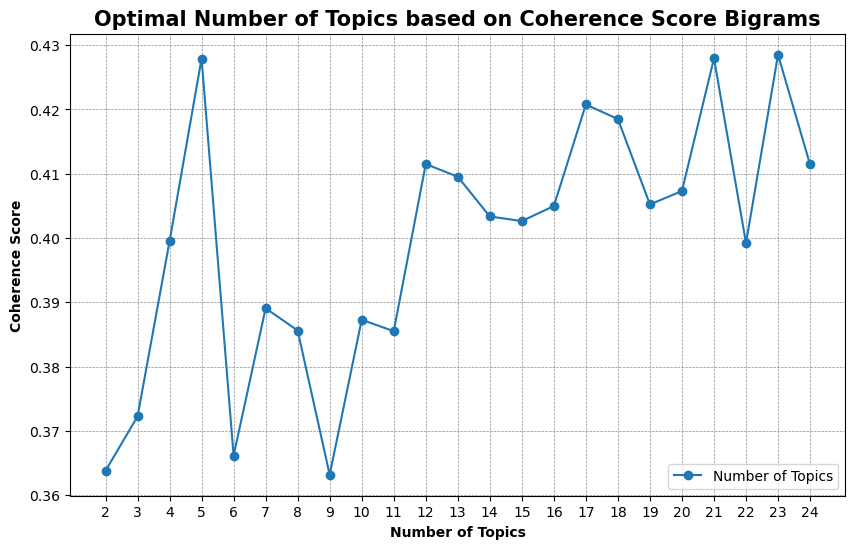

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score Bigrams',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 25))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()

Model Perplexity: -9.369235360596893
Manual Perplexity: 1.0000243059275589


In [121]:
from gensim.models import LdaModel

NUM_TOPICS = 21
CHUNKSIZE = 2000 
PASSES = 20 # how many times to rerun algorithm to improve
ITERATIONS = 800 # how many times to rerun algorithm to improve

# Make an index to word dictionary.
temp = gensim_dictionary[0]  
word_id = gensim_dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=word_id,
    chunksize=CHUNKSIZE,
    alpha='auto',
    eta='auto',
    iterations=ITERATIONS,
    num_topics=NUM_TOPICS,
    passes=PASSES,
)
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

# Calculate perplexity manually (optional)
word_count = sum(cnt for document in corpus for _, cnt in document)
log_likelihood = model.log_perplexity(corpus)
perplexity_manual = np.exp2(-log_likelihood / word_count)

print(f"Model Perplexity: {perplexity}")
print(f"Manual Perplexity: {perplexity_manual}")
model.show_topics(num_topics = -1, num_words= 25, formatted = False)[0]
list_of_topic_tables = []
for topic in model.show_topics(
    num_topics=-1, num_words=20, formatted=False
):
    list_of_topic_tables.append(
        pd.DataFrame(
            topic[1],
            columns=["Word" + "_" + str(topic[0]), "Prob" + "_" + str(topic[0])],
        )
    )
list_of_topic_tables[0]
bigdf = pd.concat(list_of_topic_tables, axis=1)
bigdf
bigdf.iloc[:, 40:50]

In [122]:
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

# Calculate perplexity manually (optional)
word_count = sum(cnt for document in corpus for _, cnt in document)
log_likelihood = model.log_perplexity(corpus)
perplexity_manual = np.exp2(-log_likelihood / word_count)

print(f"Model Perplexity: {perplexity}")
print(f"Manual Perplexity: {perplexity_manual}")

Model Perplexity: -8.662511474652987
Manual Perplexity: 1.0000075929750407


In [123]:
model.show_topics(num_topics = -1, num_words= 25, formatted = False)[0]

(0,
 [('county', 0.09063576),
  ('date', 0.06667006),
  ('grant', 0.05137855),
  ('description', 0.04216879),
  ('completion', 0.04057734),
  ('application', 0.030331008),
  ('start', 0.03024083),
  ('page', 0.028081063),
  ('person', 0.027795943),
  ('wyoming', 0.02505977),
  ('responsible', 0.023826927),
  ('amount', 0.0230818),
  ('july', 0.02279556),
  ('begin', 0.018798495),
  ('august', 0.01707459),
  ('facilitator', 0.015444361),
  ('funding', 0.014545492),
  ('account', 0.012005438),
  ('visit', 0.011584355),
  ('year', 0.010960225),
  ('updated', 0.009984465),
  ('april', 0.009694757),
  ('electronic', 0.008867552),
  ('virtual', 0.008342201),
  ('submission', 0.0074216006)])

In [124]:
list_of_topic_tables = []
for topic in model.show_topics(
    num_topics=-1, num_words=20, formatted=False
):
    list_of_topic_tables.append(
        pd.DataFrame(
            topic[1],
            columns=["Word" + "_" + str(topic[0]), "Prob" + "_" + str(topic[0])],
        )
    )
list_of_topic_tables[0]

,Word_0,Prob_0
0,county,0.090636
1,date,0.066670
2,grant,0.051379
3,description,0.042169
4,completion,0.040577
5,application,0.030331
6,start,0.030241
7,page,0.028081
8,person,0.027796
9,wyoming,0.025060


In [127]:
bigdf = pd.concat(list_of_topic_tables, axis=1)
bigdf
bigdf.iloc[:, 40:50]

,Word_20,Prob_20
0,agree,0.065647
1,strongly,0.062681
2,disagree,0.060654
3,total,0.056150
4,agreement,0.045015
5,perception,0.044449
6,result,0.041463
7,national,0.039682
8,student,0.035540
9,staff,0.022166


# Another technique for bigrams

In [258]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bothgrams_,tokens_bigrams_only,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic_plan, framework, ...","[strategic_plan, board_education, strategic_pl...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[path, forward, students, staff, families, cen...","[board_education, mission_vision, strategic_plan]",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[hide, success, ignore, presume, know, tools, ...","[safety_security, student_achievement, learnin...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[organization, stimulates, new, processes, dem...","[continuous_improvement, learning_experiences]",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[student, learning, engage, students, authenti...","[learning_experiences, safety_security]",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[divisions, operations, align, resources, supp...","[teaching_learning, professional_learning, pro...",divisions operations align resources support d...,"[divis

In [259]:
# NLTK Stop words
#tokens
#new_df
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu'])

In [261]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(new_df.tokens_clean, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[new_df.tokens_clean], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [262]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
!python -m spacy download en_core_web_sm
import spacy

In [263]:
# Remove Stop Words
data_words_nostops = remove_stopwords(new_df.tokens_clean)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['victory', 'plan', 'strategic', 'plan', 'framework', 'sim', 'superintendent', 'katika', 'meeting', 'agenda', 'overview', 'purpose', 'presentation', 'provide', 'overview', 'district', 'propose', 'strategic', 'design', 'framework', 'school', 'year', 'roadmap', 'strategic', 'planning', 'journey', 'overview', 'framework', 'strategic', 'planning']


In [267]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 3), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 5)]


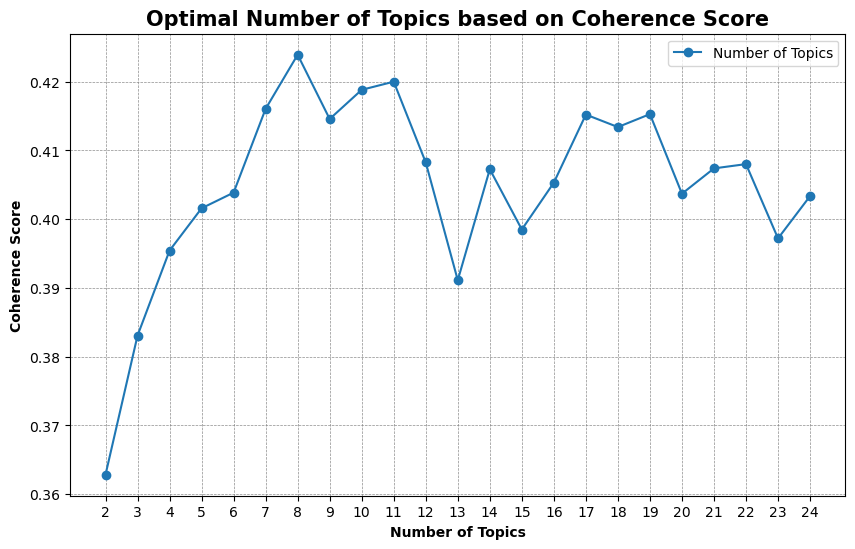

In [268]:
coherence_values = []
model_list = []
for num_topics in range(2, 25):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

plt.figure(figsize=(10,6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 25))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()

In [269]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=19, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [270]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"work" + 0.017*"believe" + 0.016*"mission" + 0.016*"challenge" + '
  '0.016*"future" + 0.015*"community" + 0.014*"make" + 0.014*"vision" + '
  '0.011*"child" + 0.011*"change"'),
 (1,
  '0.080*"teacher" + 0.042*"principal" + 0.042*"staff" + 0.022*"district" + '
  '0.020*"director" + 0.016*"provide" + 0.016*"school" + 0.015*"campus" + '
  '0.014*"training" + 0.014*"responsible"'),
 (2,
  '0.052*"datum" + 0.030*"part" + 0.022*"performance" + 0.022*"total" + '
  '0.020*"report" + 0.019*"use" + 0.019*"include" + 0.016*"school" + '
  '0.016*"student" + 0.016*"page"'),
 (3,
  '0.087*"school" + 0.060*"student" + 0.017*"year" + 0.015*"number" + '
  '0.014*"title" + 0.013*"rate" + 0.012*"part" + 0.012*"percent" + '
  '0.012*"county" + 0.011*"request"'),
 (4,
  '0.058*"fund" + 0.056*"title" + 0.042*"local" + 0.042*"program" + '
  '0.040*"state" + 0.029*"grant" + 0.025*"activity" + 0.025*"federal" + '
  '0.023*"budget" + 0.020*"page"'),
 (5,
  '0.060*"classroom" + 0.033*"activity" + 

In [271]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4582945594471698


In [283]:
lda_model.show_topics(num_topics = -1, num_words= 20, formatted = False)[0]#first topic
lda_model.show_topics(num_topics = -1, num_words= 20, formatted = False)[1]#second topic
list_of_topic_tables = []
for topic in model.show_topics(
    num_topics=-1, num_words=20, formatted=False
):
    list_of_topic_tables.append(
        pd.DataFrame(
            topic[1],
            columns=["Word" + "_" + str(topic[0]), "Prob" + "_" + str(topic[0])],
        )
    )
list_of_topic_tables[0]


,Word_0,Prob_0
0,student,0.050322
1,support,0.022989
2,learn,0.020435
3,community,0.017910
4,provide,0.017790
5,opportunity,0.016267
6,school,0.016131
7,create,0.011693
8,learning,0.011430
9,practice,0.010232


In [289]:
bigdf = pd.concat(list_of_topic_tables, axis=1)
bigdf
bigdf.iloc[:, :10
           ]#manipulate this to get topics

,Word_0,Prob_0,Word_1,Prob_1,Word_2,Prob_2,Word_3,Prob_3,Word_4,Prob_4
0,student,0.050322,datum,0.039019,grade,0.061131,school,0.058906,team,0.031098
1,support,0.022989,professional,0.036359,student,0.057234,teacher,0.041413,teacher,0.028271
2,learn,0.020435,development,0.028742,level,0.032275,student,0.032220,district,0.024143
3,community,0.017910,student,0.022331,goal,0.026545,year,0.022362,year,0.023143
4,provide,0.017790,use,0.017226,read,0.025941,support,0.017160,review,0.020910
5,opportunity,0.016267,curriculum,0.014877,assessment,0.023490,provide,0.014286,leadership,0.019399
6,school,0.016131,district,0.014675,math,0.021384,training,0.013725,instructional,0.017781
7,create,0.011693,provide,0.013663,increase,0.020382,program,0.012437,meeting,0.017682
8,learning,0.011430,school,0.012947,percentage,0.018272,staff,0.011947,classroom,0.017496
9,practice,0.010232,staff,0.012539,state,0.018009,classroom,0.009482,provide,0.016382


In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 25):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

plt.figure(figsize=(10,6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 25))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()


C:\Users\cjv20002\AppData\Local\Temp\ipykernel_27152\2309949643.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


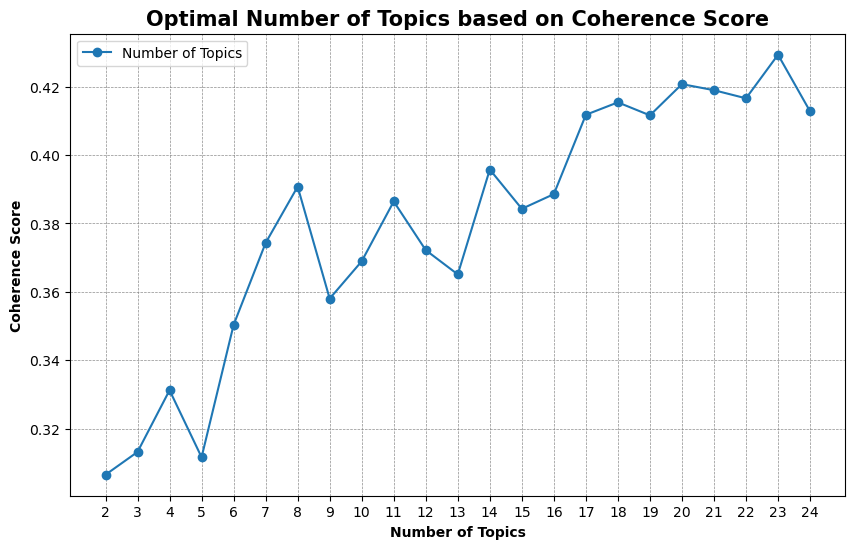

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=2000,
                                           passes=20,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
import scipy
scipy.test()

============================= test session starts =============================
platform win32 -- Python 3.9.13, pytest-7.1.2, pluggy-1.0.0
rootdir: c:\Users\cjv20002\OneDrive - University of Connecticut\Documents\Uconn_Class\Fall_2023\CGI_Independent_Study\School_Objective
plugins: anyio-3.5.0
collected 52578 items / 12041 deselected / 40537 selected

_build_utils\tests\test_scipy_version.py .                               [  0%]
_lib\tests\test__gcutils.py ......                                       [  0%]
_lib\tests\test__pep440.py .........                                     [  0%]
_lib\tests\test__testutils.py ..                                         [  0%]
_lib\tests\test__threadsafety.py ..                                      [  0%]
_lib\tests\test__util.py ........................                        [  0%]
_lib\tests\test_bunch.py ............................                    [  0%]
_lib\tests\test_ccallback.py ....                                        [  0%]
_lib\

False

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis



In [ ]:
# Prepare the LDA model for visualization
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word, n_jobs=1)

# Display the visualization
pyLDAvis.display(LDAvis_prepared)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word,n_jobs=1)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
# Create a DataFrame to store the top words for each topic
topic_words_df = pd.DataFrame()

for topic_index in range(num_topics):
    # Get the top N words for the current topic
    top_words = lda_model.show_topic(topic_index, topn=15)  # Adjust topn as needed
    
    # Create a column in the DataFrame for each topic
    topic_words_df[f'Topic_{topic_index + 1}'] = [word for word, _ in top_words]

# Convert the DataFrame to a list of lists
topic_words_list = topic_words_df.values.tolist()

# Modify the topic data to limit the number of words
for topic_index in range(num_topics):
    topic_words_list[topic_index] = topic_words_list[topic_index][:10]  # Adjust the number of words to display

# Prepare the LDA model for visualization
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word, mds='tsne', sort_topics=False, topic_words=topic_words_list)

# Display the visualization
pyLDAvis.display(LDAvis_prepared)

TypeError: prepare() got an unexpected keyword argument 'topic_words'

In [ ]:
'''
from gensim.models import LdaModel

NUM_TOPICS = 18
CHUNKSIZE = 2000 
PASSES = 20 # how many times to rerun algorithm to improve
ITERATIONS = 800 # how many times to rerun algorithm to improve

# Make an index to word dictionary.
temp = gensim_dictionary[0]  
word_id = gensim_dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=word_id,
    chunksize=CHUNKSIZE,
    alpha='auto',
    eta='auto',
    iterations=ITERATIONS,
    num_topics=NUM_TOPICS,
    passes=PASSES,
)
'''

## The Below analysis is based on UNIGRAM

In [128]:
new_df.tokens_clean

0        [victory, planned, strategic, plan, framework,...
1        [path, forward, students, staff, families, cen...
2        [foundation, phase, design, phase, implement, ...
3        [system, success, teacher, support, safe, scho...
4        [hide, success, ignore, presume, know, tools, ...
                               ...                        
13216    [organization, stimulates, new, processes, dem...
13217    [student, learning, engage, students, authenti...
13218    [approach, school, discipline, safety, promote...
13219    [divisions, operations, align, resources, supp...
13220    [opportunities, objectives, provide, communica...
Name: tokens_clean, Length: 13221, dtype: object

In [129]:
#no lemm update
gensim_dictionary = Dictionary(new_df.tokens_clean)
gensim_dictionary.token2id

{'action': 0,
 'agenda': 1,
 'beliefs': 2,
 'board': 3,
 'bold': 4,
 'call': 5,
 'chief': 6,
 'commitments': 7,
 'committee': 8,
 'communityinspired': 9,
 'dan': 10,
 'design': 11,
 'districts': 12,
 'education': 13,
 'engage': 14,
 'foundation': 15,
 'framework': 16,
 'goals': 17,
 'guiding': 18,
 'implement': 19,
 'journey': 20,
 'katika': 21,
 'layne': 22,
 'learn': 23,
 'learner': 24,
 'lovett': 25,
 'mario': 26,
 'meeting': 27,
 'mission': 28,
 'outcomes': 29,
 'overview': 30,
 'plan': 31,
 'planned': 32,
 'planning': 33,
 'presentation': 34,
 'principles': 35,
 'profile': 36,
 'proposed': 37,
 'provide': 38,
 'purpose': 39,
 'represents': 40,
 'roadmap': 41,
 'school': 42,
 'sims': 43,
 'staff': 44,
 'strategic': 45,
 'superintendent': 46,
 'takeaway': 47,
 'timeline': 48,
 'victory': 49,
 'vision': 50,
 'years': 51,
 'achieving': 52,
 'advisory': 53,
 'centered': 54,
 'community': 55,
 'ducation': 56,
 'eam': 57,
 'empowering': 58,
 'esign': 59,
 'executive': 60,
 'families': 61

In [ ]:
from gensim.corpora import Dictionary
'''
gensim_dictionary = Dictionary(new_df.clean_tokens_lemm)
gensim_dictionary.token2id
'''
#we are not lemm at least at the moment


'\ngensim_dictionary = Dictionary(new_df.clean_tokens_lemm)\ngensim_dictionary.token2id\n'

Optionally, we can limit the token dictionary to only include tokens that are present a certain number of times.

The filter_extremes() method is used to remove tokens from the dictionary that are either too rare or too common. It takes two arguments:

*no_below*: an integer that specifies the minimum number of documents (or songs, in this case) that a token must appear in to be included in the dictionary. Tokens that appear in fewer than no_below documents are removed.

*no_above*: a float that specifies the maximum fraction of documents (or songs) that a token can appear in to be included in the dictionary. Tokens that appear in more than no_above of the documents are removed.

In [ ]:
#gensim_dictionary.filter_extremes(no_below=20, no_above=0.5)

Once the dictionary is created, it can be used to convert a document from a list of tokens to a bag-of-words representation, which is a sparse vector where each element represents the count of a particular token in the document. This is done using the doc2bow() method of the Dictionary class.

In [131]:
import gensim
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt


In [ ]:
!python -m spacy download en_core_web_sm
import spacy

In [132]:
# Remove Stop Words
data_words_nostops = remove_stopwords(new_df.tokens_clean)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

NameError: name 'remove_stopwords' is not defined

In [133]:
new_df

,district,chunk_index,chunk_text,tokens,tokens_clean,clean_tokens_lemm,tokens_bigrams_only,tokens_bothgrams_,text_phrases,tokens_trigrams_
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[victory, planned, strategic, plan, framework,...","[victory, planned, strategic, plan, framework,...","[strategic_plan, board_education, strategic_pl...","[victory, planned, strategic_plan, framework, ...",victory planned strategic_plan framework dan s...,"[victory_planned, strategic_plan, framework, d..."
1,Bibb County,2,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen...","[path, forward, student, staff, family, center...","[board_education, mission_vision, strategic_plan]","[path, forward, students, staff, families, cen...",path forward students staff families centered ...,"[path_forward, students, staff, families, cent..."
2,Bibb County,3,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, phase, implement, ...","[foundation, phase, design, phase, implement, ...","[mission_vision, strategic_planning, student_a...","[foundation, phase, design, phase, implement, ...",foundation phase design phase implement july b...,"[foundation, phase, design, phase, implement, ..."
3,Bibb County,4,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...","[system, success, teacher, support, safe, scho...",[],"[system, success, teacher, support, safe, scho...",system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
4,Bibb County,5,to hide our success ignore or presume to know ...,"[to, hide, our, success, ignore, or, presume, ...","[hide, success, ignore, presume, know, tools, ...","[hide, success, ignore, presume, know, tool, s...","[safety_security, student_achievement, learnin...","[hide, success, ignore, presume, know, tools, ...",hide success ignore presume know tools support...,"[hide, success, ignore, presume, know, tools, ..."
...,...,...,...,...,...,...,...,...,...,...
13216,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, stimulates, new, processes, dem...","[organization, stimulates, new, process, deman...","[continuous_improvement, learning_experiences]","[organization, stimulates, new, processes, dem...",organization stimulates new processes demands ...,"[organization, stimulates, new, processes, dem..."
13217,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, students, authenti...","[student, learning, engage, student, authentic...","[learning_experiences, safety_security]","[student, learning, engage, students, authenti...",student learning engage students authentic rea...,"[student, learning, engage, students, authenti..."
13218,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, school, discipline, safety, promote...","[approach, school, discipline, safety, promote...","[continuous_improvement, mental_health, studen...","[approach, school, discipline, safety, promote...",approach school discipline safety promotes pos...,"[approach, school, discipline, safety, promote..."
13219,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[divisions, operations, align, resources, supp...","[division, operation, align, resource, support...","[teaching_learning, professional_learning, pro...","[divisions, operations, align, resources, supp...",divisions operations align resources support d...,"[divis

In [134]:
#corpus in the gensim 
#update to  lemm
gensim_dictionary = Dictionary(new_df.tokens_clean)
gensim_dictionary.token2id
corpus = []
for doc in new_df.tokens_clean:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[4]
coherence_values = []
model_list = []
for num_topics in range(2, 25):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df.tokens_clean, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

13221


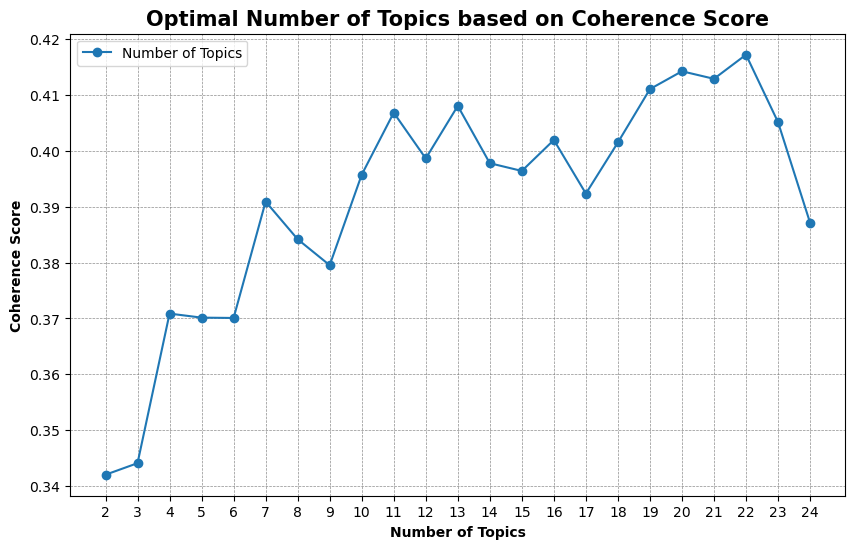

In [135]:

plt.figure(figsize=(10,6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 25))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()

In [136]:
gensim_dictionary = Dictionary(new_df.tokens_clean)
gensim_dictionary.token2id

corpus = []
for doc in new_df.tokens_clean:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[1]

gensim_dictionary.token2id
corpus

13221


[(0, 1),
 (2, 1),
 (3, 2),
 (5, 1),
 (7, 1),
 (11, 3),
 (13, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (20, 2),
 (23, 1),
 (24, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (35, 1),
 (36, 1),
 (44, 1),
 (45, 4),
 (50, 2),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 2),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 2),
 (81, 2),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1)]

In [140]:
NUM_TOPICS = 22
CHUNKSIZE = 2000 
PASSES = 20 # how many times to rerun algorithm to improve
ITERATIONS = 800 # how many times to rerun algorithm to improve

# Make an index to word dictionary.
temp = gensim_dictionary[0]  
word_id = gensim_dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=word_id,
    chunksize=CHUNKSIZE,
    alpha='auto',
    eta='auto',
    iterations=ITERATIONS,
    num_topics=NUM_TOPICS,
    passes=PASSES,
)


In [141]:
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

# Calculate perplexity manually (optional)
word_count = sum(cnt for document in corpus for _, cnt in document)
log_likelihood = model.log_perplexity(corpus)
perplexity_manual = np.exp2(-log_likelihood / word_count)

print(f"Model Perplexity: {perplexity}")
print(f"Manual Perplexity: {perplexity_manual}")


Model Perplexity: -9.129574496882615
Manual Perplexity: 1.0000079810381655


In [142]:
model.show_topics(num_topics = -1, num_words= 25, formatted = False)[0]


(0,
 [('american', 0.07000975),
  ('african', 0.04285772),
  ('white', 0.03953178),
  ('black', 0.035283934),
  ('students', 0.02997734),
  ('respondents', 0.027120788),
  ('hispanic', 0.024778936),
  ('color', 0.023408132),
  ('native', 0.022505375),
  ('state', 0.02245975),
  ('asian', 0.020793835),
  ('two', 0.019095715),
  ('compared', 0.018981725),
  ('association', 0.018628726),
  ('gap', 0.016350724),
  ('pride', 0.016298532),
  ('indian', 0.015109539),
  ('races', 0.013698822),
  ('islander', 0.013488668),
  ('staff', 0.013015933),
  ('pacific', 0.012026793),
  ('county', 0.011836952),
  ('intent', 0.0113628805),
  ('degree', 0.010899406),
  ('points', 0.010897943)])

In [143]:
list_of_topic_tables = []
for topic in model.show_topics(
    num_topics=-1, num_words=20, formatted=False
):
    list_of_topic_tables.append(
        pd.DataFrame(
            topic[1],
            columns=["Word" + "_" + str(topic[0]), "Prob" + "_" + str(topic[0])],
        )
    )


In [147]:
list_of_topic_tables[0]
bigdf = pd.concat(list_of_topic_tables, axis=1)
bigdf
bigdf.iloc[:, 40:50]

,Word_20,Prob_20,Word_21,Prob_21
0,school,0.107669,plan,0.113120
1,elementary,0.066693,strategic,0.082703
2,education,0.058517,district,0.047963
3,high,0.044472,goal,0.033909
4,support,0.037702,goals,0.030178
5,middle,0.035946,year,0.026090
6,building,0.025038,school,0.024982
7,program,0.024325,board,0.023513
8,teacher,0.023350,action,0.018513
9,special,0.016016,improvement,0.016713


In [148]:
combined_df = pd.concat(list_of_topic_tables, axis=1)

# Export to CSV
combined_df.to_csv('c:\\Users\\cjv20002\\OneDrive - University of Connecticut\\Documents\\Uconn_Class\\Fall_2023\\CGI_Independent_Study\\School_Objective\\22_topics_uni.csv', index=False)

Model Perplexity: -8.020393097397116
Manual Perplexity: 1.0000173540930972


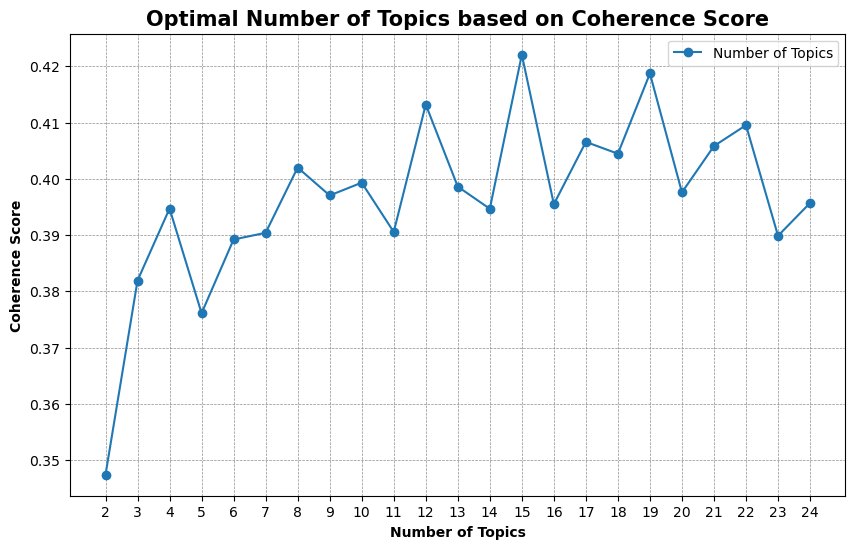

In [ ]:
''''
plt.plot(range(2, 15), coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics based on Coherence Score')
plt.show()
'''
gensim_dictionary = Dictionary(new_df.clean_tokens_lemm)
gensim_dictionary.token2id
corpus = []
for doc in new_df.clean_tokens_lemm:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[4]
coherence_values = []
model_list = []
for num_topics in range(2, 25):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df.clean_tokens_lemm, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())


plt.figure(figsize=(10,6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 25))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()

In [ ]:
import matplotlib
matplotlib.use('TkAgg')


In [ ]:
'''

plt.figure(figsize=(10,6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 25))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()
'''

50 is a lot of topics 
10-20 topics 

(Topic Modeling)
(put a proposal on the following:)
* Reading aritcles -->NOT to use
* how to pick the number of topics in LDA (a paragraph the number of topics and all the things mentioned before for characteristics)
* how to evaluate TP (conherent and complexity)

#thoughts (think about how to make this decision in the topic modeling session)
* We did not cover this in class --> revisit the 
* come up an empriircal methods of deciding things 
(going back and rid of the stop wordws)
what are the decisions you have to make when running a tm
What is the best model? three resonable model (combinations of decisons )
* number of topics
* chunks (100) should it be 100?, 50?
* should we include bigrams? or unigrams?
* should we lemm?
* maximun number of words maybe keeping 

Strategic plan
* method section of the paper, how do we decise, resonable approach to deciding which model to use
* 

In [ ]:
.tokens_clean

In [297]:
from gensim.models import LdaModel

NUM_TOPICS = 21
CHUNKSIZE = 2000 
PASSES = 20 # how many times to rerun algorithm to improve
ITERATIONS = 800 # how many times to rerun algorithm to improve

# Make an index to word dictionary.
temp = gensim_dictionary[0]  
word_id = gensim_dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=word_id,
    chunksize=CHUNKSIZE,
    alpha='auto',
    eta='auto',
    iterations=ITERATIONS,
    num_topics=NUM_TOPICS,
    passes=PASSES,
)

In [110]:
import numpy as np
from gensim.models import LdaModel
from scipy.stats import hmean

In [111]:
#Exclusive score
# Assuming 'model' is your trained LdaModel
num_topics = 19
num_words = 20  # number of top words to consider for each topic
exclusivity_scores=[]

# Function to calculate exclusivity
def calculate_exclusivity(model, word_id, num_topics):
    exclusivity_score = 0
    term_topics = model.get_term_topics(word_id, minimum_probability=0)
    term_topics_dict = {topic_id: prob for topic_id, prob in term_topics}

    for t in range(num_topics):
        # Add the probability if the word is in the topic, else add 0
        exclusivity_score += term_topics_dict.get(t, 0)

    return exclusivity_score

# Calculate exclusivity and harmonic mean for each topic
for topic_id in range(num_topics):
    top_words = model.get_topic_terms(topic_id, topn=num_words)
    probabilities = [prob for _, prob in top_words]
    exclusivities = [calculate_exclusivity(model, word_id, num_topics) for word_id, _ in top_words]

    # Compute the harmonic mean
    harmonic_mean_scores = [hmean([prob, 1/exclusivity]) for prob, exclusivity in zip(probabilities, exclusivities)]
    topic_score = np.mean(harmonic_mean_scores)
    exclusivity_scores.append(topic_score)

    print(f"Topic {topic_id} Score: {topic_score}")

Topic 0 Score: 0.05568706581071818
Topic 1 Score: 0.0390407608859559
Topic 2 Score: 0.04196888247095038
Topic 3 Score: 0.04300189846573398
Topic 4 Score: 0.028878266603871848
Topic 5 Score: 0.03402399776519098
Topic 6 Score: 0.029538437056381244
Topic 7 Score: 0.03404526330526035
Topic 8 Score: 0.01983494075596172
Topic 9 Score: 0.047574622140139064
Topic 10 Score: 0.031184202660599132
Topic 11 Score: 0.03181414465815193
Topic 12 Score: 0.03342286603024701
Topic 13 Score: 0.041916728481212806
Topic 14 Score: 0.037344836091275944
Topic 15 Score: 0.04078484766871983
Topic 16 Score: 0.02284697854776541
Topic 17 Score: 0.03977144315814325
Topic 18 Score: 0.06639317095607292


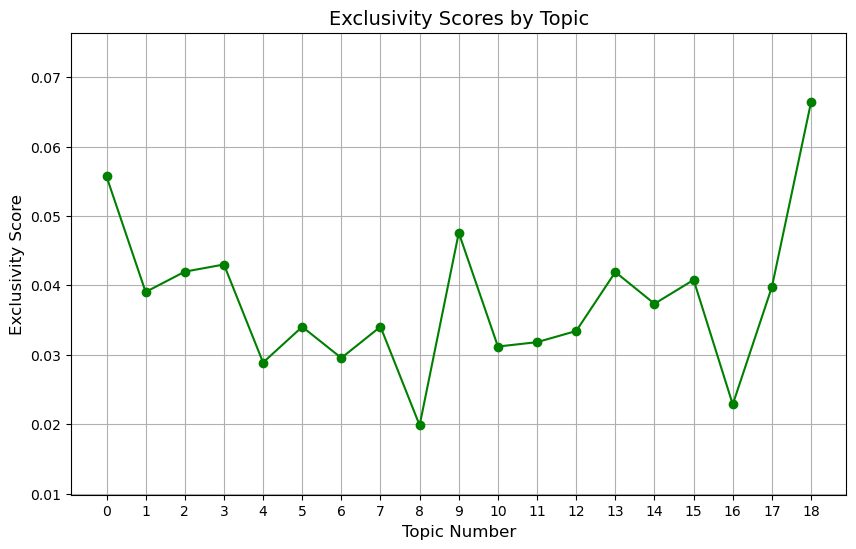

In [112]:
#see it in a graph 
# Initialize the list to store scores
exclusivity_scores = []

# Assuming you have the LdaModel already trained and available as 'model'
# and gensim_dictionary is available as well
for topic_id in range(num_topics):
    top_words = model.get_topic_terms(topic_id, topn=num_words)
    probabilities = [prob for _, prob in top_words]
    exclusivities = [calculate_exclusivity(model, word_id, num_topics) for word_id, _ in top_words]

    # Compute the harmonic mean
    harmonic_mean_scores = [hmean([prob, 1/exclusivity]) if exclusivity != 0 else 0 for prob, exclusivity in zip(probabilities, exclusivities)]
    topic_score = np.mean(harmonic_mean_scores)
    
    # Append the score to the list
    exclusivity_scores.append(topic_score)

# Now plot the scores
topics = list(range(num_topics))  # Create a list of topic numbers

# Create the line plot
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
plt.plot(topics, exclusivity_scores, marker='o', linestyle='-', color='green')  # 'o' creates the round markers

# Customize the plot with titles and labels
plt.title('Exclusivity Scores by Topic', fontsize=14)
plt.xlabel('Topic Number', fontsize=12)
plt.ylabel('Exclusivity Score', fontsize=12)
plt.xticks(topics)  # Ensure we have a tick for every topic number
plt.ylim(min(exclusivity_scores) - 0.01, max(exclusivity_scores) + 0.01)  # Set y-axis limits

# Display the plot
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
import gensim
from gensim.models import CoherenceModel, LdaModel
from gensim import corpora
from gensim.corpora import Dictionary


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(new_df.tokens_clean)

# Create Corpus
texts = new_df.tokens_clean

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Prepare the LDA model for visualization
LDAvis_prepared = gensimvis.prepare(model, corpus, id2word, n_jobs=1)

# Display the visualization
pyLDAvis.display(LDAvis_prepared)

In [ ]:
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

# Calculate perplexity manually (optional)
word_count = sum(cnt for document in corpus for _, cnt in document)
log_likelihood = model.log_perplexity(corpus)
perplexity_manual = np.exp2(-log_likelihood / word_count)

print(f"Model Perplexity: {perplexity}")
print(f"Manual Perplexity: {perplexity_manual}")

Model Perplexity: -8.898381430723637
Manual Perplexity: 1.0000077624286454


Notes
* what is this say about what distric carea about?

In [ ]:
model.show_topics(num_topics = -1, num_words= 20, formatted = False)[0]#first topic
model.show_topics(num_topics = -1, num_words= 20, formatted = False)[1]#second topic

(1,
 [('curriculum', 0.022025105),
  ('student', 0.01945284),
  ('data', 0.019033225),
  ('learning', 0.01884519),
  ('instructional', 0.018427914),
  ('instruction', 0.018253839),
  ('teachers', 0.015147756),
  ('support', 0.014506668),
  ('provide', 0.0124379685),
  ('needs', 0.011804069),
  ('students', 0.011768114),
  ('assessment', 0.011444626),
  ('use', 0.011004842),
  ('standards', 0.010863131),
  ('strategies', 0.010783904),
  ('professional', 0.010487717),
  ('district', 0.010380013),
  ('development', 0.009381801),
  ('practices', 0.009044623),
  ('implementation', 0.008800174)])

#Topic one
* career and college (get rid of the stopwords)

In [299]:
model.show_topics(num_topics = -1, num_words= 20, formatted = False)[0]#first topic
model.show_topics(num_topics = -1, num_words= 20, formatted = False)[1]#second topic
list_of_topic_tables = []
for topic in model.show_topics(
    num_topics=-1, num_words=20, formatted=False
):
    list_of_topic_tables.append(
        pd.DataFrame(
            topic[1],
            columns=["Word" + "_" + str(topic[0]), "Prob" + "_" + str(topic[0])],
        )
    )
list_of_topic_tables[0]

,Word_0,Prob_0
0,team,0.040893
1,director,0.036742
2,superintendent,0.033488
3,year,0.033151
4,principal,0.032365
5,staff,0.031265
6,june,0.029964
7,review,0.023486
8,leadership,0.023174
9,resource,0.021323


In [305]:
bigdf = pd.concat(list_of_topic_tables, axis=1)
bigdf
bigdf.iloc[:, 20:45]#manipulate this to get topics


,Word_10,Prob_10,Word_11,Prob_11,Word_12,Prob_12,Word_13,Prob_13,Word_14,Prob_14,...,Word_16,Prob_16,Word_17,Prob_17,Word_18,Prob_18,Word_19,Prob_19,Word_20,Prob_20
0,school,0.114456,strategy,0.099587,una,0.079892,school,0.059042,health,0.062057,...,school,0.064196,agree,0.120598,school,0.056839,student,0.042895,teacher,0.069266
1,high,0.063469,formative,0.053149,lo,0.079733,student,0.047306,safety,0.057426,...,district,0.041880,disagree,0.111425,title,0.044729,school,0.032555,school,0.027335
2,elementary,0.043069,district,0.047452,south,0.042121,program,0.038280,student,0.044412,...,community,0.026809,national,0.093338,total,0.028402,help,0.011185,professional,0.016162
3,middle,0.033042,campus,0.045022,pipeline,0.039362,support,0.037261,social,0.039617,...,strategic,0.022997,perception,0.081656,strongly,0.027930,need,0.010605,staff,0.015652
4,college,0.031421,detail,0.030097,reduction,0.035578,community,0.029579,behavior,0.039550,...,plan,0.021329,result,0.076650,lea,0.027095,work,0.010557,survey,0.014062
5,career,0.030586,independent,0.028496,carolina,0.021285,family,0.025575,staff,0.035678,...,public,0.020321,teacher,0.027404,part,0.025966,also,0.009790,training,0.013858
6,rate,0.029393,monitoring,0.028201,historically,0.014342,parent,0.025207,emotional,0.033082,...,vision,0.019056,staff,0.022621,page,0.022290,group,0.008785,development,0.013330
7,increase,0.028579,review,0.028111,los,0.013639,district,0.022751,mental,0.029314,...,board,0.018665,community,0.022336,agreement,0.020059,one,0.008629,provide,0.013023
8,course,0.026832,pm,0.026983,suggestion,0.012614,service,0.021807,safe,0.024606,...,mission,0.017323,lcap,0.012927,section,0.014947,make,0.007825,data,0.012942
9,student,0.024866,staff,0.023338,projection,0.011758,education,0.017612,security,0.024183,...,value,0.012900,powered,0.010535,required,0.013715,estimated,0.007013,district,0.009805


In [309]:
combined_df = pd.concat(list_of_topic_tables, axis=1)

# Export to CSV
combined_df.to_csv('c:\\Users\\cjv20002\\OneDrive - University of Connecticut\\Documents\\Uconn_Class\\Fall_2023\\CGI_Independent_Study\\School_Objective\\lda_topics.csv', index=False)



In [307]:

# %%
import pandas as pd
import numpy as np
from NPF.teachers_and_covid import start
from NPF.library import process
from NPF.library import topic_modeling
from functools import reduce
import os
import tqdm


# import spacy
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
import gensim.corpora as corpora

ModuleNotFoundError: No module named 'NPF'

In [310]:
new_df['clean_tokens_lemm']

0        [victory, planned, strategic, plan, framework,...
1        [path, forward, student, staff, family, center...
2        [foundation, phase, design, phase, implement, ...
3        [system, success, teacher, support, safe, scho...
4        [hide, success, ignore, presume, know, tool, s...
                               ...                        
13216    [organization, stimulates, new, process, deman...
13217    [student, learning, engage, student, authentic...
13218    [approach, school, discipline, safety, promote...
13219    [division, operation, align, resource, support...
13220    [opportunity, objective, provide, communicatio...
Name: clean_tokens_lemm, Length: 13221, dtype: object

In [ ]:



NUM_WORDS_TO_VIEW = 10
PASSES = 1
DROP_FREQ_BELOW = 10

NUM_TOPICS = [5, 10, 50, 100]
KEEP_TOP = [500, 1000, 100000]
DROP_FREQ_ABOVE = [0.3, 0.5]
# %%
documents_df = pd.read_csv('documents_df.csv', delimiter='|')
tweets = tweets[
    [
        "unique_id",
        "text",
        "created",
        "likes",
        "retweets",
        "quotes",
        "replies",
        "author_id",
        "geo",
        "random_set",
    ]
]
tweets["text"] = tweets["text"].str.replace("&amp;", "&")
tweets["text"] = tweets["text"].str.replace("#", "")  # remove hashtag

# tweets = tweets.sample(1000, random_state=352)

# %%
df = tweets
list(df.head(1).text)
text_corpus = list(df.text)

# %%

pbar = tqdm.tqdm(total=len(NUM_TOPICS) * len(KEEP_TOP) * len(DROP_FREQ_ABOVE))
for i in NUM_TOPICS:
    for j in KEEP_TOP:
        for k in DROP_FREQ_ABOVE:
            model_name = "topic" + str(i) + "words" + str(j) + "freqbelow" + str(k)
            newpath = start.MAIN_DIR + "results/" + model_name + "/"
            if not os.path.exists(newpath):
                os.makedirs(newpath)

            pbar.update(1)
            dictionary, corpus = process.process_text(
                text_corpus,
                trigram=True,
                stopwords=True,
                no_below=DROP_FREQ_BELOW,
                no_above=k,
                keep_n=j,
            )
            corpus = [dictionary.doc2bow(text) for text in corpus]

            lda = gensim.models.LdaModel(
                corpus,
                id2word=dictionary,
                num_topics=i,
                passes=PASSES,
                random_state=4,
                per_word_topics=True,
            )

            topic_modeling.create_topic_tables(
                lda=lda,
                corpus=corpus,
                dictionary=dictionary,
                tweets_df=tweets,
                num_topics=i,
                folder_path=newpath,
            )
pbar.close()

In [ ]:
import pandas as pd
import numpy as np
from NPF.teachers_and_covid import start
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from openpyxl import load_workbook
from functools import reduce


import nltk
import gensim
from nltk.tokenize import word_tokenize


def create_topic_tables(
    lda,
    corpus,
    dictionary,
    tweets_df,
    num_topics: int,
    folder_path: str,
    num_words_to_view=10,
):
    list_of_topic_tables = []
    for topic in lda.show_topics(
        num_topics=num_topics, num_words=num_words_to_view, formatted=False
    ):
        list_of_topic_tables.append(
            pd.DataFrame(
                topic[1],
                columns=["Word" + "_" + str(topic[0]), "Prob" + "_" + str(topic[0])],
            )
        )

    bigdf = reduce(
        lambda x, y: pd.merge(x, y, left_index=True, right_index=True),
        list_of_topic_tables,
    )

    bigdf.to_csv(folder_path + "topics.csv", index=False)

    lda.get_document_topics(corpus[0], minimum_probability=0)

    topic_probs = [
        [
            topic_prob[1]
            for topic_prob in lda.get_document_topics(doc, minimum_probability=0)
        ]
        for doc in corpus
    ]
    topic_probs_df = pd.DataFrame(topic_probs, columns=list(np.arange(0, num_topics)))
    tweets_topics = (
        tweets_df[["unique_id", "text"]]
        .reset_index()
        .merge(topic_probs_df, left_index=True, right_index=True)
    )
    tweets_topics.to_csv(folder_path + "tweet_topics.csv", index=False)
    token2id_df = (
        pd.DataFrame.from_dict(dictionary.token2id, orient="index")
        .reset_index()
        .rename(columns={"index": "term", 0: "term_id"})
    )
    token_topics = []
    for term in token2id_df.term_id:
        token_topics.append(
            topic[1] for topic in lda.get_term_topics(term, minimum_probability=0)
        )
    token_topics_df = pd.DataFrame(token_topics)
    token_topics_df["term"] = token2id_df.term

    cols = list(token_topics_df)
    cols.insert(0, cols.pop(cols.index("term")))
    token_topics_df = token_topics_df[cols]

    token_topics_df.to_csv(folder_path + "word_topics.csv", index=False)

In [ ]:
#import sys
#print(sys.executable)
#import matplotlib.pyplot as plt
#from wordcloud import WordCloud

In [ ]:
pip install --upgrade pillow wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow in c:\users\cjv20002\anaconda3\lib\site-packages (9.2.0)
     ---------------------------------------- 2.6/2.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\cjv20002\\Anaconda3\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a new DataFrame to store the sorted words
# Define a function to generate a word cloud for a specific column (topic)
def generate_topic_word_cloud(topic_index):
    # Get the column name for the word and probability
    word_col_name = f'Word_{topic_index}'
    prob_col_name = f'Prob_{topic_index}'
    
    # Create a dictionary to store words and their probabilities
    word_probabilities = dict(zip(bigdf[word_col_name], bigdf[prob_col_name]))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400)
    wordcloud.generate_from_frequencies(word_probabilities)
    
    # Display the word cloud
    plt.figure(figsize=(3, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_index}')
    plt.show()

# Iterate through each topic (column) and generate word clouds
for topic_index in range(18):  # Assuming you have 12 topics (adjust as needed)
    generate_topic_word_cloud(topic_index)

c:\Users\cjv20002\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\cjv20002\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\cjv20002\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\cjv20002\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.RO

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_topic_word_cloud(topic_index):
    word_col_name = f'Word_{topic_index}'
    prob_col_name = f'Prob_{topic_index}'
    
    if word_col_name in bigdf and prob_col_name in bigdf:
        word_probabilities = dict(zip(bigdf[word_col_name], bigdf[prob_col_name]))
        print(f"Topic {topic_index}: ", word_probabilities)  # Debugging line

        wordcloud = WordCloud(width=800, height=400)
        wordcloud.generate_from_frequencies(word_probabilities)

        plt.figure(figsize=(3, 2))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Topic {topic_index}')
        plt.show()
    else:
        print(f"Columns for Topic {topic_index} not found.")

for topic_index in range(18):  # Adjust the range as per the number of topics
    generate_topic_word_cloud(topic_index)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#18 topics

# Create a new DataFrame to store the sorted words
# Define a function to generate a word cloud for a specific column (topic)
def generate_topic_word_cloud(topic_index):
    # Get the column name for the word and probability
    word_col_name = f'Word_{topic_index}'
    prob_col_name = f'Prob_{topic_index}'
    
    # Create a dictionary to store words and their probabilities
    word_probabilities = dict(zip(bigdf[word_col_name], bigdf[prob_col_name]))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=100)  # Adjust width and height as needed
    wordcloud.generate_from_frequencies(word_probabilities)
    
    # Plot the word cloud within the 3x6 grid
    plt.subplot(6, 3, topic_index + 1)  # Adjust subplot position
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_index}')

# Create a 3x6 grid for the word clouds
plt.figure(figsize=(24, 12))  # Adjust the figsize as needed

# Iterate through each topic (column) and generate word clouds
for topic_index in range(18):  # Assuming you have 18 topics
    generate_topic_word_cloud(topic_index)

# Adjust spacing and display the grid
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a new DataFrame to store the sorted words
# Define a function to generate a word cloud for a specific column (topic)
def generate_topic_word_cloud(topic_index):
    # Get the column name for the word and probability
    word_col_name = f'Word_{topic_index}'
    prob_col_name = f'Prob_{topic_index}'
    
    # Create a dictionary to store words and their probabilities
    word_probabilities = dict(zip(bigdf[word_col_name], bigdf[prob_col_name]))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=200)  # Adjust width and height as needed
    wordcloud.generate_from_frequencies(word_probabilities)
    
    # Plot the word cloud within the 3x4 grid
    plt.subplot(3, 3, topic_index + 1)  # Adjust subplot position
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_index}')

# Create a 3x4 grid for the word clouds
plt.figure(figsize=(16, 12))  # Adjust the figsize as needed

# Iterate through each topic (column) and generate word clouds
for topic_index in range(18):  # Assuming you have 12 topics (adjust as needed)
    generate_topic_word_cloud(topic_index)

# Adjust spacing and display the grid
plt.tight_layout()
plt.show()



Without LEMM

In [ ]:
bigdf

,Word_0,Prob_0,Word_1,Prob_1,Word_2,Prob_2,Word_3,Prob_3,Word_4,Prob_4,...,Word_13,Prob_13,Word_14,Prob_14,Word_15,Prob_15,Word_16,Prob_16,Word_17,Prob_17
0,staff,0.027875,plan,0.057826,school,0.124154,strategy,0.105735,education,0.047525,...,yes,0.053472,professional,0.029475,group,0.022080,agree,0.058583,draft,0.024818
1,year,0.023179,strategic,0.037010,schools,0.039715,formative,0.060112,district,0.030167,...,masters,0.028082,teachers,0.028264,staff,0.019067,total,0.055193,skills,0.024682
2,district,0.023155,district,0.034159,education,0.030196,district,0.043700,special,0.024476,...,meets,0.020809,learning,0.026892,rps,0.012527,disagree,0.054127,world,0.024570
3,goal,0.020047,school,0.021100,district,0.026620,june,0.034914,language,0.023666,...,proposed,0.020721,development,0.025836,research,0.012009,national,0.044347,february,0.023986
4,resources,0.017408,goals,0.018970,high,0.026525,details,0.032517,developing,0.018829,...,certification,0.020650,curriculum,0.022286,would,0.011628,results,0.039070,mission,0.022547
5,review,0.015536,process,0.016126,students,0.024559,reviews,0.031758,english,0.017925,...,approaches,0.018860,students,0.022088,participants,0.010159,students,0.038454,always,0.021084
6,technology,0.014590,planning,0.013121,elementary,0.021913,independent,0.031688,arts,0.016399,...,shall,0.016316,instructional,0.021861,like,0.009593,perceptions,0.036764,reality,0.018640
7,director,0.013914,improvement,0.012289,county,0.020253,monitoring,0.030739,state,0.015713,...,replace,0.015744,student,0.020486,need,0.009552,teachers,0.019935,dream,0.015889
8,team,0.012775,schools,0.010446,community,0.018507,campus,0.030604,standards,0.015267,...,respondents,0.012483,instruction,0.018471,groups,0.009548,school,0.016710,thinking,0.015152
9,school,0.012485,board,0.009693,middle,0.014338,staff,0.028142,services,0.014508,...,sometimes,0.012222,support,0.015287,also,0.008055,know,0.013694,vision,0.014420


In [ ]:
model.get_document_topics(corpus[0], minimum_probability=0)

[(0, 0.00014465391),
 (1, 0.00030368706),
 (2, 0.03596966),
 (3, 0.00061082153),
 (4, 0.013703036),
 (5, 0.0003182361),
 (6, 0.00018880736),
 (7, 0.00023636948),
 (8, 0.5954078),
 (9, 0.0001146497),
 (10, 0.00016459098),
 (11, 0.00025192296),
 (12, 7.3912415e-05),
 (13, 8.850687e-05),
 (14, 0.00031394843),
 (15, 0.00014458394),
 (16, 0.0001723842),
 (17, 0.000436716),
 (18, 0.00061645365),
 (19, 0.0003039492),
 (20, 0.00017643576),
 (21, 0.0008073486),
 (22, 0.00043175768),
 (23, 0.0004895525),
 (24, 7.3912415e-05),
 (25, 0.00016197073),
 (26, 0.00028133576),
 (27, 9.686604e-05),
 (28, 0.00029316382),
 (29, 0.01454386),
 (30, 0.0005905538),
 (31, 0.00029620068),
 (32, 0.0011164629),
 (33, 0.00028125604),
 (34, 0.00010240685),
 (35, 0.00030895844),
 (36, 0.00021214403),
 (37, 0.00021926968),
 (38, 0.00032733713),
 (39, 0.00017035242),
 (40, 0.00024543735),
 (41, 0.32670212),
 (42, 0.00017911813),
 (43, 0.00027920012),
 (44, 7.778878e-05),
 (45, 8.1109196e-05),
 (46, 0.0009807105),
 (47,

# Create a list of topic probabilities for each document (list of lists)

In [ ]:
topic_probs = []
for document in corpus:
    document_topics = []
    for topic_prob in model.get_document_topics(document, minimum_probability=0):
        document_topics.append(topic_prob[1])
    topic_probs.append(document_topics)
topic_probs[0]

[0.00014465391,
 0.0003036871,
 0.035968173,
 0.0006108216,
 0.013703027,
 0.00031823613,
 0.00018880737,
 0.0002363695,
 0.5954076,
 0.00011464971,
 0.000164591,
 0.00025192296,
 7.3912415e-05,
 8.850688e-05,
 0.00031394846,
 0.00014458396,
 0.00017238421,
 0.00043671604,
 0.0006164537,
 0.00030394923,
 0.00017643577,
 0.00080734864,
 0.00043175774,
 0.0004895525,
 7.3912415e-05,
 0.00016197075,
 0.0002813358,
 9.6866046e-05,
 0.00029316382,
 0.014543851,
 0.00059055386,
 0.0002962007,
 0.001116463,
 0.00028125607,
 0.000102406855,
 0.00030895846,
 0.00021214405,
 0.0002192697,
 0.00032733715,
 0.00017035243,
 0.00024543735,
 0.3267038,
 0.00017911814,
 0.00027920015,
 7.778878e-05,
 8.11092e-05,
 0.0009807106,
 0.00019625179,
 0.0005457148,
 0.00016674922]

In [ ]:
topic_probs_df = pd.DataFrame(topic_probs)
topic_probs_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000145,0.000304,0.035968,0.000611,0.013703,0.000318,0.000189,0.000236,0.595408,0.000115,...,0.000245,0.326704,0.000179,0.000279,0.000078,0.000081,0.000981,0.000196,0.000546,0.000167
1,0.000145,0.000304,0.275784,0.000611,0.000176,0.000318,0.011270,0.000236,0.358736,0.000115,...,0.000246,0.340188,0.000179,0.000279,0.000078,0.000081,0.000981,0.000196,0.000546,0.000167
2,0.000145,0.000303,0.001366,0.000610,0.000176,0.028200,0.000189,0.000236,0.503704,0.000115,...,0.000245,0.433062,0.000179,0.000279,0.000078,0.000081,0.000980,0.000196,0.000545,0.000167
3,0.000143,0.000301,0.001353,0.000605,0.000175,0.000315,0.000187,0.000234,0.721082,0.000114,...,0.000243,0.127372,0.000177,0.000277,0.000077,0.000080,0.000972,0.000194,0.000541,0.000165
4,0.000312,0.000656,0.002944,0.001319,0.000381,0.000687,0.027213,0.000510,0.333952,0.000248,...,0.000530,0.228277,0.000387,0.000603,0.000168,0.000175,0.002118,0.000424,0.001179,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,0.000145,0.000303,0.220467,0.000610,0.000176,0.000318,0.000189,0.000236,0.480145,0.000115,...,0.000245,0.285197,0.000179,0.000279,0.000078,0.000081,0.000980,0.000196,0.000545,0.000167
5216,0.000144,0.022628,0.001363,0.028121,0.000176,0.000318,0.000189,0.000236,0.552717,0.000115,...,0.000245,0.361401,0.000179,0.000279,0.000078,0.000081,0.000980,0.000196,0.000545,0.000167
5217,0.000143,0.000300,0.001349,0.039856,0.000175,0.000315,0.000187,0.000234,0.715776,0.000113,...,0.000243,0.210852,0.000177,0.000276,0.000077,0.000080,0.000970,0.000194,0.000540,0.000165
5218,0.000143,0.000300,0.001349,0.000604,0.000175,0.000315,0.000187,0.000234,0.711543,0.000113,...,0.000243,0.216313,0.000177,0.000276,0.000077,0.000080,0.000970,0.000194,0.000540,0.000165


In [ ]:
df_topics = (
    new_df[['district',	'chunk_index','chunk_text',	'tokens','clean_tokens_lemm']]
    .reset_index()
    .merge(topic_probs_df, left_index=True, right_index=True)
)
df_topics

,index,district,chunk_index,chunk_text,tokens,clean_tokens_lemm,0,1,2,3,...,40,41,42,43,44,45,46,47,48,49
0,0,Fairview SD 72,1,community connections and relations develop co...,"[community, connections, and, relations, devel...","[community, connection, and, relation, develop...",0.000145,0.000304,0.035968,0.000611,...,0.000245,0.326704,0.000179,0.000279,0.000078,0.000081,0.000981,0.000196,0.000546,0.000167
1,1,Fairview SD 72,2,overall development and well being mission sta...,"[overall, development, and, well, being, missi...","[overall, development, and, well, being, missi...",0.000145,0.000304,0.275784,0.000611,...,0.000246,0.340188,0.000179,0.000279,0.000078,0.000081,0.000981,0.000196,0.000546,0.000167
2,2,Fairview SD 72,3,the needs of our learners a safe physical and ...,"[the, needs, of, our, learners, a, safe, physi...","[the, need, of, our, learner, a, safe, physica...",0.000145,0.000303,0.001366,0.000610,...,0.000245,0.433062,0.000179,0.000279,0.000078,0.000081,0.000980,0.000196,0.000545,0.000167
3,3,Fairview SD 72,4,fairviews diverse faculty and staff recruit an...,"[fairviews, diverse, faculty, and, staff, recr...","[fairviews, diverse, faculty, and, staff, recr...",0.000143,0.000301,0.001353,0.000605,...,0.000243,0.127372,0.000177,0.000277,0.000077,0.000080,0.000972,0.000194,0.000541,0.000165
4,4,Fairview SD 72,5,learning fairview school district 72 strategic...,"[learning, fairview, school, district, 72, str...","[learning, fairview, school, district, 72, str...",0.000312,0.000656,0.002944,0.001319,...,0.000530,0.228277,0.000387,0.000603,0.000168,0.000175,0.002118,0.000424,0.001179,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,5215,SPOTSYLVANIA CO PBLC SCHS,2,organization that stimulates new processes and...,"[organization, that, stimulates, new, processe...","[organization, that, stimulates, new, process,...",0.000145,0.000303,0.220467,0.000610,...,0.000245,0.285197,0.000179,0.000279,0.000078,0.000081,0.000980,0.000196,0.000545,0.000167
5216,5216,SPOTSYLVANIA CO PBLC SCHS,3,student learning engage all students in authen...,"[student, learning, engage, all, students, in,...","[student, learning, engage, all, student, in, ...",0.000144,0.022628,0.001363,0.028121,...,0.000245,0.361401,0.000179,0.000279,0.000078,0.000081,0.000980,0.000196,0.000545,0.000167
5217,5217,SPOTSYLVANIA CO PBLC SCHS,4,approach to school discipline and safety that ...,"[approach, to, school, discipline, and, safety...","[approach, to, school, discipline, and, safety...",0.000143,0.000300,0.001349,0.039856,...,0.000243,0.210852,0.000177,0.000276,0.000077,0.000080,0.000970,0.000194,0.000540,0.000165
5218,5218,SPOTSYLVANIA CO PBLC SCHS,5,of the divisions operations that align resourc...,"[of, the, divisions, operations, that, align, ...","[of, the, division, operation, that, align, re...",0.000143,0.000300,0.001349,0.000604,...,0.000243,0.216313,0.000177,0.000276,0.000077,0.000080,0.000970,0.000194,0.000540,0.000165


In [ ]:
'''
# Create a list to store coherence scores
from gensim.models import CoherenceModel
coherence_scores = []

for num_topics in range(2, 51):
    model = LdaModel(
        corpus=corpus,
        id2word=word_id,
        chunksize=CHUNKSIZE,
        alpha='auto',
        eta='auto',
        iterations=ITERATIONS,
        num_topics=num_topics,
        passes=PASSES,
    )
    
    coherence_model = CoherenceModel(model=model, texts=corpus, dictionary=gensim_dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Find the number of topics with the highest coherence score
optimal_num_topics = coherence_scores.index(max(coherence_scores)) + 2  # Add 2 because we started from 2 topics
print(f"Optimal number of topics: {optimal_num_topics}")
'''

'\n# Create a list to store coherence scores\nfrom gensim.models import CoherenceModel\ncoherence_scores = []\n\nfor num_topics in range(2, 51):\n    model = LdaModel(\n        corpus=corpus,\n        id2word=word_id,\n        chunksize=CHUNKSIZE,\n        alpha=\'auto\',\n        eta=\'auto\',\n        iterations=ITERATIONS,\n        num_topics=num_topics,\n        passes=PASSES,\n    )\n    \n    coherence_model = CoherenceModel(model=model, texts=corpus, dictionary=gensim_dictionary, coherence=\'c_v\')\n    coherence_score = coherence_model.get_coherence()\n    coherence_scores.append(coherence_score)\n\n# Find the number of topics with the highest coherence score\noptimal_num_topics = coherence_scores.index(max(coherence_scores)) + 2  # Add 2 because we started from 2 topics\nprint(f"Optimal number of topics: {optimal_num_topics}")\n'

# WITH 50


In [ ]:
len(documents_df)

350

In [60]:
# Define a function to split text into 100-word chunks
# Define a function to split text into 100-word chunks
def split_text_into_chunks(text):
    words = text.split()
    chunks_split = [words[i:i + 50] for i in range(0, len(words), 50)]
    return [' '.join(chunk_split) for chunk_split in chunks_split]


In [61]:

# Create new documents
new_documents = []

for index, row in documents_df.iterrows():
    text_lower = row['text_lower']
    chunks = split_text_into_chunks(text_lower)
    
    for i, chunk in enumerate(chunks):
        new_document = {
            'district': row['district'],
            'chunk_index': i + 1,
            'chunk_text': chunk
        }
        new_documents.append(new_document)

In [62]:

new_df_50 = pd.DataFrame(new_documents)

len(new_df_50)
display(new_df_50)

,district,chunk_index,chunk_text
0,Bibb County,1,built4bibb more victory planned 20232028 strat...
1,Bibb County,2,strategic design framework for the 20232028 sc...
2,Bibb County,3,path forward for our students staff and famili...
3,Bibb County,4,sessions principal executive leader and adviso...
4,Bibb County,5,the foundation phase i design oct 2022may 2023...
...,...,...,...
26291,SPOTSYLVANIA CO PBLC SCHS,8,health needs of students and staff 24 optimize...
26292,SPOTSYLVANIA CO PBLC SCHS,9,of the divisions operations that align resourc...
26293,SPOTSYLVANIA CO PBLC SCHS,10,34 engage all employees in ongoing highquality...
26294,SPOTSYLVANIA CO PBLC SCHS,11,opportunities objectives 41 provide communicat...


In [63]:
#105 pages for West york Area SD
#strategic plans 
chunk_counts_50 = new_df_50.groupby('district')['chunk_index'].count().reset_index()

# Rename the count column to 'total_chunks' for clarity
chunk_counts_50 = chunk_counts_50.rename(columns={'chunk_index': 'total_chunks'})

# Display the result
print(chunk_counts_50)


                          district  total_chunks
0      ALBANY CITY SCHOOL DISTRICT             7
1    ALDEN CENTRAL SCHOOL DISTRICT             5
2        ALEXANDRIA CITY PBLC SCHS           146
3                         ANADARKO           161
4           ARLINGTON CO PBLC SCHS            20
..                             ...           ...
289          Wilson County Schools            32
290                     Winchendon             5
291     Winchester School District            12
292            YORK PUBLIC SCHOOLS           109
293                        York 01            18

[294 rows x 2 columns]


In [64]:
#Tokens
def split_string(text):
    tokens = text.split(" ")
    return tokens
new_df_50["tokens"] = new_df_50.chunk_text.apply(split_string)
new_df_50.head()

,district,chunk_index,chunk_text,tokens
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,..."
1,Bibb County,2,strategic design framework for the 20232028 sc...,"[strategic, design, framework, for, the, 20232..."
2,Bibb County,3,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and..."
3,Bibb County,4,sessions principal executive leader and adviso...,"[sessions, principal, executive, leader, and, ..."
4,Bibb County,5,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m..."


In [65]:
PUNTUATION= [".",",","'","?","!","-"]
def remove_punctuation (token_list):
    new_token_list =[]
    for token in token_list:
        if token not in PUNTUATION:
            new_token_list.append(token)
    return new_token_list

new_df_50['tokens_clean']=new_df_50.tokens.apply(remove_stop_words)
new_df_50['tokens_clean']=new_df_50.tokens.apply(remove_punctuation)
def remove_numbers(token_list):
    return [token for token in token_list if not token.isdigit()]

#remove numbers
new_df_50['tokens_clean']=new_df_50.tokens_clean.apply(remove_numbers)
#remove letters such as s n r ( i think these letters are due to lemm)
def remove_single_letters(token_list):
    return [token for token in token_list if len(token) > 1]
new_df_50['tokens_clean']=new_df_50.tokens_clean.apply(remove_single_letters)

In [66]:
nltk.download('punkt')
nltk.download('stopwords')
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
new_df_50.head()

,district,chunk_index,chunk_text,tokens,tokens_clean
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[built4bibb, more, victory, planned, strategic..."
1,Bibb County,2,strategic design framework for the 20232028 sc...,"[strategic, design, framework, for, the, 20232...","[strategic, design, framework, for, the, schoo..."
2,Bibb County,3,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, for, our, students, staff, and..."
3,Bibb County,4,sessions principal executive leader and adviso...,"[sessions, principal, executive, leader, and, ...","[sessions, principal, executive, leader, and, ..."
4,Bibb County,5,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[the, foundation, phase, design, oct, 2022may,..."


In [67]:
# Define a function to remove stopwords 
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

# Apply the stopwords to the 'tokens_clean' column
new_df_50['tokens_clean'] = new_df_50['tokens_clean'].apply(remove_stopwords)

# Display the updated DataFrame

In [ ]:
new_df_50.head()#this have stop words removed 

,district,chunk_index,chunk_text,tokens,tokens_clean
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[built4bibb, victory, planned, strategic, plan..."
1,Bibb County,2,strategic design framework for the 20232028 sc...,"[strategic, design, framework, for, the, 20232...","[strategic, design, framework, school, years, ..."
2,Bibb County,3,path forward for our students staff and famili...,"[path, forward, for, our, students, staff, and...","[path, forward, students, staff, families, cen..."
3,Bibb County,4,sessions principal executive leader and adviso...,"[sessions, principal, executive, leader, and, ...","[sessions, principal, executive, leader, advis..."
4,Bibb County,5,the foundation phase i design oct 2022may 2023...,"[the, foundation, phase, i, design, oct, 2022m...","[foundation, phase, design, oct, 2022may, phas..."


In [68]:
gensim_dictionary = Dictionary(new_df_50.tokens_clean)
gensim_dictionary.token2id
corpus = []
for doc in new_df_50.tokens_clean:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[4]

26296


[(27, 2),
 (30, 1),
 (31, 1),
 (34, 1),
 (35, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (43, 2),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (54, 1),
 (77, 1),
 (83, 1),
 (85, 1),
 (90, 1),
 (92, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),
 (101, 1),
 (102, 1),
 (103, 1),
 (104, 2),
 (105, 1),
 (106, 1),
 (107, 1)]

In [69]:
coherence_values = []
model_list = []
for num_topics in range(2, 15):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df_50.tokens_clean, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

KeyboardInterrupt: 

In [ ]:
#pip install pyqt5 

     ---------------------------------------- 6.8/6.8 MB 24.3 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.6 MB/s eta 0:00:00
     --------------------------------------- 50.1/50.1 MB 23.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires ipython<8.0.0,>=7.6.0, but you have ipython 8.12.0 which is incompatible.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.10 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip3 install PyQt5==5.9.2

SyntaxError: invalid syntax (285397885.py, line 1)

In [ ]:
 use pip to install tk

26296


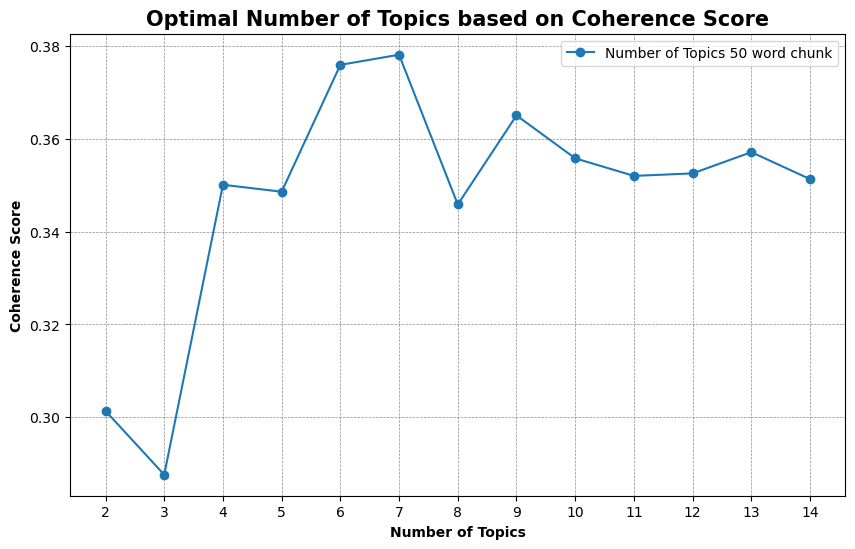

In [70]:
gensim_dictionary = Dictionary(new_df_50.tokens_clean)
gensim_dictionary.token2id
corpus = []
for doc in new_df_50.tokens_clean:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[4]
coherence_values = []
model_list = []
for num_topics in range(2, 15):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df_50.tokens_clean, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

plt.figure(figsize=(10,6))
plt.plot(range(2, 15), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics 50 word chunk")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 15))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()

#Calculate perplexity

In [71]:
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

# Calculate perplexity manually (optional)
word_count = sum(cnt for document in corpus for _, cnt in document)
log_likelihood = model.log_perplexity(corpus)
perplexity_manual = np.exp2(-log_likelihood / word_count)

print(f"Model Perplexity: {perplexity}")
print(f"Manual Perplexity: {perplexity_manual}")

Model Perplexity: -9.587838082971839
Manual Perplexity: 1.0000081579174382


# 150 Word Chunk

In [72]:
#150
def split_text_into_chunks(text):
    words = text.split()
    chunks_split = [words[i:i + 150] for i in range(0, len(words), 150)]
    return [' '.join(chunk_split) for chunk_split in chunks_split]
# Create new documents
new_documents = []

for index, row in documents_df.iterrows():
    text_lower = row['text_lower']
    chunks = split_text_into_chunks(text_lower)
    
    for i, chunk in enumerate(chunks):
        new_document = {
            'district': row['district'],
            'chunk_index': i + 1,
            'chunk_text': chunk
        }
        new_documents.append(new_document)
new_df_150 = pd.DataFrame(new_documents)

len(new_df_150)
display(new_df_150)

,district,chunk_index,chunk_text
0,Bibb County,1,built4bibb more victory planned 20232028 strat...
1,Bibb County,2,sessions principal executive leader and adviso...
2,Bibb County,3,system success teacher support safe schools st...
3,Bibb County,4,students are empowered to learn lead innovate ...
4,Bibb County,5,solve problems demonstrate empathy b4b roadmap...
...,...,...,...
8857,Davidson County,13,woychick assistant principal of wallburg eleme...
8858,SPOTSYLVANIA CO PBLC SCHS,1,draft 1 innovative pathways to the future enga...
8859,SPOTSYLVANIA CO PBLC SCHS,2,organizational excellence citizenship we commi...
8860,SPOTSYLVANIA CO PBLC SCHS,3,approach to school discipline and safety that ...


In [73]:
chunk_counts_150 = new_df_150.groupby('district')['chunk_index'].count().reset_index()

# Rename the count column to 'total_chunks' for clarity
chunk_counts_150 = chunk_counts_150.rename(columns={'chunk_index': 'total_chunks'})

# Display the result
print(chunk_counts_150)


                          district  total_chunks
0      ALBANY CITY SCHOOL DISTRICT             3
1    ALDEN CENTRAL SCHOOL DISTRICT             2
2        ALEXANDRIA CITY PBLC SCHS            49
3                         ANADARKO            54
4           ARLINGTON CO PBLC SCHS             7
..                             ...           ...
289          Wilson County Schools            11
290                     Winchendon             2
291     Winchester School District             4
292            YORK PUBLIC SCHOOLS            37
293                        York 01             6

[294 rows x 2 columns]


In [74]:
#Tokens
def split_string(text):
    tokens = text.split(" ")
    return tokens
new_df_150["tokens"] = new_df_150.chunk_text.apply(split_string)
new_df_150.head()

,district,chunk_index,chunk_text,tokens
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,..."
1,Bibb County,2,sessions principal executive leader and adviso...,"[sessions, principal, executive, leader, and, ..."
2,Bibb County,3,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho..."
3,Bibb County,4,students are empowered to learn lead innovate ...,"[students, are, empowered, to, learn, lead, in..."
4,Bibb County,5,solve problems demonstrate empathy b4b roadmap...,"[solve, problems, demonstrate, empathy, b4b, r..."


In [75]:
PUNTUATION= [".",",","'","?","!","-"]
def remove_punctuation (token_list):
    new_token_list =[]
    for token in token_list:
        if token not in PUNTUATION:
            new_token_list.append(token)
    return new_token_list

new_df_150['tokens_clean']=new_df_150.tokens.apply(remove_stop_words)
new_df_150['tokens_clean']=new_df_50.tokens.apply(remove_punctuation)
def remove_numbers(token_list):
    return [token for token in token_list if not token.isdigit()]

#remove numbers
new_df_150['tokens_clean']=new_df_150.tokens_clean.apply(remove_numbers)
#remove letters such as s n r ( i think these letters are due to lemm)
def remove_single_letters(token_list):
    return [token for token in token_list if len(token) > 1]
new_df_150['tokens_clean']=new_df_150.tokens_clean.apply(remove_single_letters)

In [76]:
new_df_150.head()

,district,chunk_index,chunk_text,tokens,tokens_clean
0,Bibb County,1,built4bibb more victory planned 20232028 strat...,"[built4bibb, more, victory, planned, 20232028,...","[built4bibb, more, victory, planned, strategic..."
1,Bibb County,2,sessions principal executive leader and adviso...,"[sessions, principal, executive, leader, and, ...","[strategic, design, framework, for, the, schoo..."
2,Bibb County,3,system success teacher support safe schools st...,"[system, success, teacher, support, safe, scho...","[path, forward, for, our, students, staff, and..."
3,Bibb County,4,students are empowered to learn lead innovate ...,"[students, are, empowered, to, learn, lead, in...","[sessions, principal, executive, leader, and, ..."
4,Bibb County,5,solve problems demonstrate empathy b4b roadmap...,"[solve, problems, demonstrate, empathy, b4b, r...","[the, foundation, phase, design, oct, 2022may,..."


In [77]:
nltk.download('punkt')
nltk.download('stopwords')
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# Define a function to remove stopwords 
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

# Apply the stopwords to the 'tokens_clean' column
new_df_150['tokens_clean'] = new_df_150['tokens_clean'].apply(remove_stopwords)

In [ ]:
new_df_150.head()

,district,chunk_index,chunk_text,tokens,tokens_clean
0,Fairview SD 72,1,community connections and relations develop co...,"[community, connections, and, relations, devel...","[community, connections, relations, develop, c..."
1,Fairview SD 72,2,a strong curriculum a diverse and engaged comm...,"[a, strong, curriculum, a, diverse, and, engag...","[sustainability, social, emotional, learning, ..."
2,Fairview SD 72,3,fairviews diverse faculty and staff recruit an...,"[fairviews, diverse, faculty, and, staff, recr...","[overall, development, well, mission, statemen..."
3,Chardon Local,1,20232028 success plan board adopted january 20...,"[20232028, success, plan, board, adopted, janu...","[strong, curriculum, diverse, engaged, communi..."
4,Chardon Local,2,our strategic goals the success plan 2028 was ...,"[our, strategic, goals, the, success, plan, 20...","[needs, learners, safe, physical, emotional, s..."


In [79]:
gensim_dictionary = Dictionary(new_df_150.tokens_clean)
gensim_dictionary.token2id
corpus = []
for doc in new_df_150.tokens_clean:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[4]

8862


[(27, 2),
 (30, 1),
 (31, 1),
 (34, 1),
 (35, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (43, 2),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (54, 1),
 (77, 1),
 (83, 1),
 (85, 1),
 (90, 1),
 (92, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),
 (101, 1),
 (102, 1),
 (103, 1),
 (104, 2),
 (105, 1),
 (106, 1),
 (107, 1)]

8862


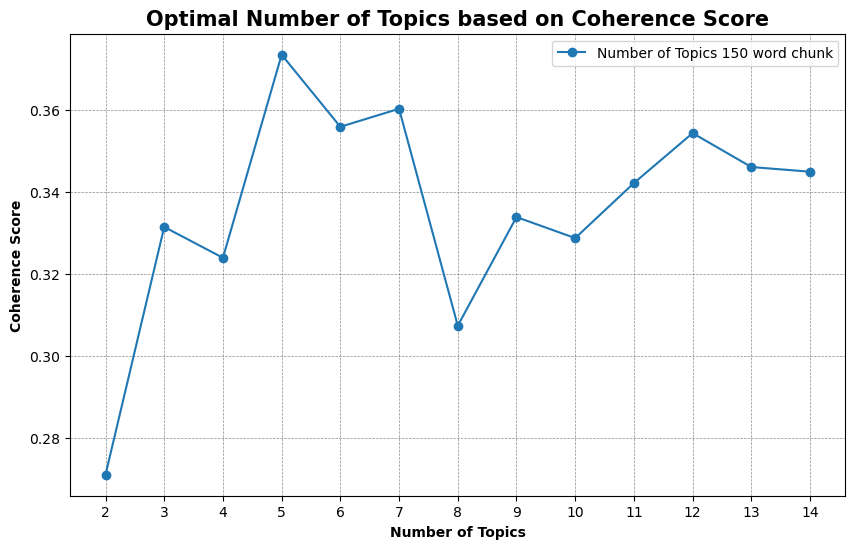

In [80]:
gensim_dictionary = Dictionary(new_df_150.tokens_clean)
gensim_dictionary.token2id
corpus = []
for doc in new_df_150.tokens_clean:
    corpus.append(gensim_dictionary.doc2bow(doc))
print(len(corpus))
corpus[4]
coherence_values = []
model_list = []
for num_topics in range(2, 15):  # For example, checking from 2 to 15 topics
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df_150.tokens_clean, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

plt.figure(figsize=(10,6))
plt.plot(range(2, 15), coherence_values, '-o', linewidth=1.5, markersize=6, label = "Number of Topics 150 word chunk")  # '-o' will also create a point for each data point in the line plot
plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder = 1, linewidth =.5)
#plt.set_facecolor('#F5F5F5')
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score',fontsize=15,fontweight='bold' )
plt.xticks(range(2, 15))  # To ensure all x-values are shown
plt.grid(True)  # To add a grid for better readability
plt.legend()
plt.show()

In [ ]:
# Calculate perplexity
perplexity = model.log_perplexity(corpus)

# Calculate perplexity manually (optional)
word_count = sum(cnt for document in corpus for _, cnt in document)
log_likelihood = model.log_perplexity(corpus)
perplexity_manual = np.exp2(-log_likelihood / word_count)

print(f"Model Perplexity: {perplexity}")
print(f"Manual Perplexity: {perplexity_manual}")

Model Perplexity: -8.991517391766278
Manual Perplexity: 1.0000600948207266


In [ ]:
#Trying to plot them togehter

#All of the TOGETHER

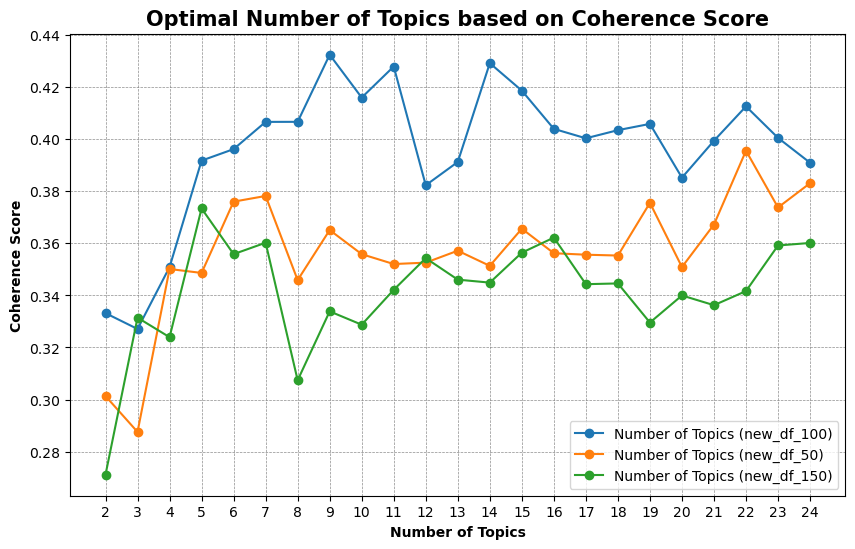

In [106]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Create a dictionary and corpus for new_df
gensim_dictionary = Dictionary(new_df.tokens_clean)
corpus = [gensim_dictionary.doc2bow(doc) for doc in new_df.tokens_clean]

coherence_values = []
model_list = []

# Calculate coherence scores for new_df
for num_topics in range(2, 25):
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gensim_dictionary, random_state=42)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df.tokens_clean, dictionary=gensim_dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Create a dictionary and corpus for new_df_50
gensim_dictionary_50 = Dictionary(new_df_50.tokens_clean)
corpus_50 = [gensim_dictionary_50.doc2bow(doc) for doc in new_df_50.tokens_clean]

coherence_values_50 = []
model_list_50 = []

# Calculate coherence scores for new_df_50
for num_topics in range(2, 25):
    model = LdaModel(corpus=corpus_50, num_topics=num_topics, id2word=gensim_dictionary_50, random_state=42)
    model_list_50.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df_50.tokens_clean, dictionary=gensim_dictionary_50, coherence='c_v')
    coherence_values_50.append(coherence_model.get_coherence())

# Create a dictionary and corpus for new_df_50
gensim_dictionary_150 = Dictionary(new_df_150.tokens_clean)
corpus_150 = [gensim_dictionary_50.doc2bow(doc) for doc in new_df_150.tokens_clean]

coherence_values_150 = []
model_list_150 = []

# Calculate coherence scores for new_df_50
for num_topics in range(2, 25):
    model = LdaModel(corpus=corpus_150, num_topics=num_topics, id2word=gensim_dictionary_150, random_state=42)
    model_list_150.append(model)
    coherence_model = CoherenceModel(model=model, texts=new_df_150.tokens_clean, dictionary=gensim_dictionary_150, coherence='c_v')
    coherence_values_150.append(coherence_model.get_coherence())

# Plot coherence scores for both datasets
plt.figure(figsize=(10, 6))
plt.plot(range(2, 25), coherence_values, '-o', linewidth=1.5, markersize=6, label="Number of Topics (new_df_100)")
plt.plot(range(2, 25), coherence_values_50, '-o', linewidth=1.5, markersize=6, label="Number of Topics (new_df_50)")
plt.plot(range(2, 25), coherence_values_150, '-o', linewidth=1.5, markersize=6, label="Number of Topics (new_df_150)")

plt.grid(axis='both', linestyle='--', alpha=0.9, color='grey', zorder=1, linewidth=.5)
plt.xlabel('Number of Topics', fontweight='bold')
plt.ylabel('Coherence Score', fontweight='bold')
plt.title('Optimal Number of Topics based on Coherence Score', fontsize=15, fontweight='bold')
plt.xticks(range(2, 25))
plt.grid(True)
plt.legend()
plt.show()


# Bigram

In [ ]:
bigram_list2

['community_engagement',
 'maintain_fiscal',
 'social_emotional',
 'current_future',
 'academic_social',
 'mission_statement',
 'strong_foundation',
 'academic_excellence',
 'personal_growth',
 'high_expectations',
 'cultural_diversity',
 'vision_statement',
 'personal_growth',
 'belief_statements',
 'student_achievement',
 'instructional_strategies',
 'physical_emotional',
 'decisions_made',
 'community_service',
 'business_partnerships',
 'intervention_programs',
 'student_achievement',
 'continuum_services',
 'physical_activity',
 'faculty_staff',
 'recruit_hire',
 'community_service',
 'strategic_plan',
 'professional_development',
 'personalized_learning',
 'report_cards',
 'review_cycle',
 'curriculum_instruction',
 'board_education',
 'chardon_local',
 'strategic_plan',
 'planning_process',
 'covid19_pandemic',
 'community_members',
 'vision_mission',
 'core_beliefs',
 'strategic_plan',
 'action_steps',
 'chardon_local',
 'chardon_local',
 'mission_statement',
 'core_beliefs',
 

In [ ]:
# Define a function to tokenize using bigrams
def tokenize_with_bigrams(text):
    tokens = word_tokenize(text)
    # Combine consecutive tokens if they form a bigram
    bigram_tokens = [bigram for bigram in bigram_list2 if bigram.replace('_', ' ') in text]
    return tokens + bigram_tokens

# Tokenize the 'chunk_text' column and create a new column 'tokens_with_bigrams'
new_df_50['tokens_with_bigrams'] = new_df_50['chunk_text'].apply(tokenize_with_bigrams)
new_df_50.head()

NameError: name 'new_df_50' is not defined

In [ ]:
# Check if the bigram exists in the text
# Initialize a flag to indicate if any bigram is found
bigram_found = False

# Iterate through each bigram in the list
for bigram in bigram_list2:
    # Check if the bigram exists in the 'tokens_with_bigrams' column of new_df_50
    if any(bigram.replace('_', ' ') in text for text in new_df_50['tokens_with_bigrams']):
        bigram_found = True
        print(f"The bigram '{bigram}' exists in at least one text.")

# If no bigram is found, print a message
if not bigram_found:
    print("None of the specified bigrams exist in the text.")

KeyboardInterrupt: 

In [ ]:
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to tokenize text into bigrams
def tokenize_into_bigrams(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())  # Convert to lowercase for consistency
    
    # Remove stopwords (common words like 'and', 'the', 'of' that are often not informative)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Generate bigrams from the list of words
    bigram_tokens = list(bigrams(words))
    
    # Combine bigrams into strings
    bigram_strings = [' '.join(bigram) for bigram in bigram_tokens]
    
    return bigram_strings


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjv20002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Example usage:
#sample_text = "community connections and relations develop"
tokenized_bigrams = tokenize_into_bigrams(new_df_50['chunk_text'])
print(tokenized_bigrams)

AttributeError: 'Series' object has no attribute 'lower'